In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np


In [3]:
from responsibly.dataset import build_FICO_dataset

FICO = build_FICO_dataset()
FICO.keys()


/Applications/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


dict_keys(['total', 'totals', 'cdf', 'pdf', 'performance', 'base_rates', 'base_rate', 'proportions', 'fpr', 'tpr', 'rocs', 'aucs'])

In [5]:
print (FICO['pdf'])
print (np.sum(FICO['pdf']))

        Asian   Black  Hispanic   White
Score                                  
0.0    0.0000  0.0007    0.0001  0.0001
0.5    0.0013  0.0112    0.0046  0.0025
1.0    0.0075  0.0414    0.0175  0.0090
1.5    0.0019  0.0114    0.0052  0.0027
2.0    0.0025  0.0142    0.0075  0.0037
...       ...     ...       ...     ...
98.0   0.0101  0.0024    0.0042  0.0125
98.5   0.0067  0.0006    0.0022  0.0068
99.0   0.0028  0.0004    0.0010  0.0029
99.5   0.0005  0.0001    0.0002  0.0007
100.0  0.0006  0.0000    0.0000  0.0002

[198 rows x 4 columns]
Asian       1.0
Black       1.0
Hispanic    1.0
White       1.0
dtype: float64


In [6]:
print (FICO['cdf'])

        Asian   Black  Hispanic   White
Score                                  
0.0    0.0000  0.0007    0.0001  0.0001
0.5    0.0013  0.0119    0.0047  0.0026
1.0    0.0088  0.0533    0.0222  0.0116
1.5    0.0107  0.0647    0.0274  0.0143
2.0    0.0132  0.0789    0.0349  0.0180
...       ...     ...       ...     ...
98.0   0.9894  0.9989    0.9966  0.9894
98.5   0.9961  0.9995    0.9988  0.9962
99.0   0.9989  0.9999    0.9998  0.9991
99.5   0.9994  1.0000    1.0000  0.9998
100.0  1.0000  1.0000    1.0000  1.0000

[198 rows x 4 columns]


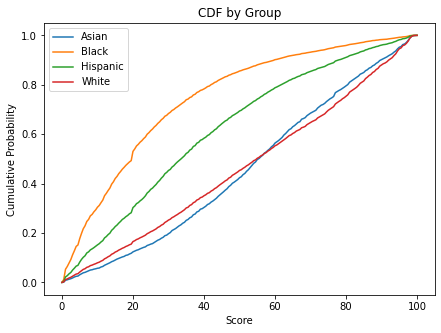

In [7]:
f, ax = plt.subplots(1, figsize=(7, 5))

FICO['cdf'].plot(ax=ax)

plt.title('CDF by Group')
plt.ylabel('Cumulative Probability');

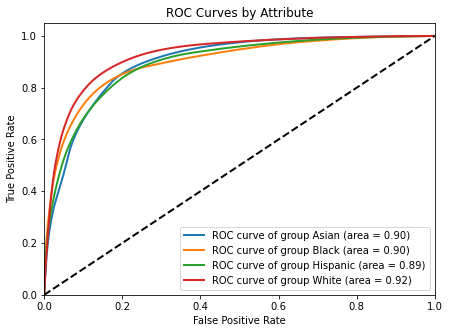

In [8]:
from responsibly.fairness.metrics import plot_roc_curves
plot_roc_curves(FICO['rocs'], FICO['aucs'],
                figsize=(7, 5));

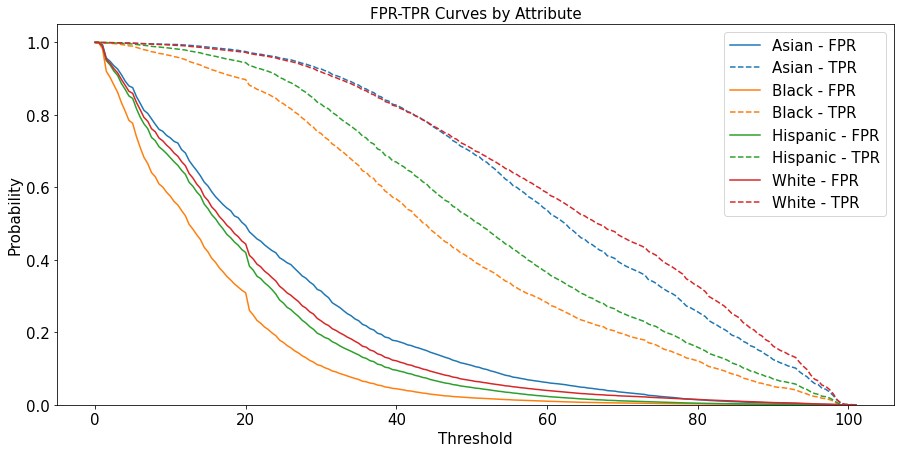

In [9]:
from responsibly.fairness.interventions.threshold import (find_thresholds,
                                                          plot_fpt_tpr,
                                                          plot_roc_curves_thresholds,
                                                          plot_costs,
                                                          plot_thresholds)
plot_fpt_tpr(FICO['rocs'], figsize=(15, 7),
             title_fontsize=15, text_fontsize=15);

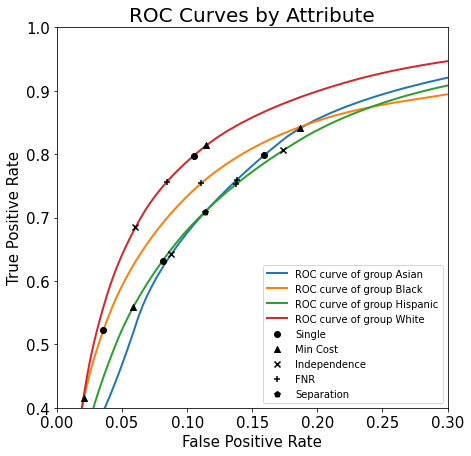

In [10]:
COST_MATRIX = [[0, -5/6],
               [0,  1/6]]
thresholds_data = find_thresholds(FICO['rocs'],
                                  FICO['proportions'],
                                  FICO['base_rate'],
                                  FICO['base_rates'],
                                  COST_MATRIX)
plot_roc_curves_thresholds(FICO['rocs'], thresholds_data,
                           figsize=(7, 7),
                           title_fontsize=20, text_fontsize=15);
plt.xlim(0, 0.3)
plt.ylim(0.4, 1);

In [11]:
thresholds_data

{'single': (42.5,
  {'Asian': (0.1592109782414771, 0.7982257394726957),
   'Black': (0.035624752025169557, 0.5222536366818649),
   'Hispanic': (0.08111605397194042, 0.6318581559145168),
   'White': (0.10494970149747891, 0.7974084986440748)},
  -0.06830401860252308),
 'min_cost': ({'Asian': 38.5, 'Black': 49.0, 'Hispanic': 47.0, 'White': 41.0},
  {'Asian': (0.18688340039863302, 0.8409289340716818),
   'Black': (0.02074827440869302, 0.41489917370822765),
   'Hispanic': (0.05865353927132365, 0.558987593602798),
   'White': (0.11484787793720098, 0.8138995270074795)},
  -0.06876633661556937),
 'independence': ({'Asian': 53.5,
   'Black': 18.0,
   'Hispanic': 31.5,
   'White': 52.0},
  {'Asian': (0.08776430097924898, 0.6420627855534078),
   'Black': (0.344514417294136, 0.9081312317336167),
   'Hispanic': (0.17392716755489357, 0.8061475266133505),
   'White': (0.06029820126917803, 0.6844160268999958)},
  -0.046725728876261405,
  0.532796101034295),
 'fnr': ({'Asian': 45.5, 'Black': 29.5, 'His

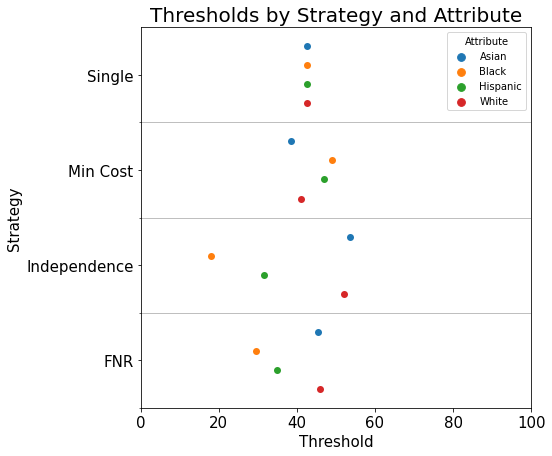

In [12]:
plot_thresholds(thresholds_data,
                xlim=(0, 100), figsize=(7, 7),
                title_fontsize=20, text_fontsize=15);

In [13]:
thresholds_data.keys()

dict_keys(['single', 'min_cost', 'independence', 'fnr', 'separation'])

In [206]:
COST_MATRIX = [[0, -5/6],
               [0,  1/6]]


In [212]:
print (thresholds_data['single'])

(42.5, {'Asian': (0.159210978241477, 0.7982257394726964), 'Black': (0.03562475202516957, 0.5222536366818645), 'Hispanic': (0.0811160539719404, 0.6318581559145164), 'White': (0.10494970149747886, 0.7974084986440749)}, -0.06830401860252308)


In [213]:
print (thresholds_data['fnr'])

({'Asian': 45.5, 'Black': 29.5, 'Hispanic': 35.0, 'White': 46.0}, {'Asian': (0.13830821486672065, 0.7597270937393894), 'Black': (0.11069747158860148, 0.753996048320934), 'Hispanic': (0.13779115742038225, 0.7528248235528201), 'White': (0.0845338139109347, 0.7565831625671293)}, -0.06366480646248814, 0.2402515268107051)


In [215]:
print (thresholds_data['min_cost'])

({'Asian': 38.5, 'Black': 49.0, 'Hispanic': 47.0, 'White': 41.0}, {'Asian': (0.18688340039863297, 0.8409289340716826), 'Black': (0.020748274408693028, 0.4148991737082274), 'Hispanic': (0.05865353927132363, 0.5589875936027977), 'White': (0.11484787793720092, 0.8138995270074796)}, -0.06876633661556936)


# Adaptive Data Debiasing through Bounded Exploraiton and Fairness

This code is under Adult dataset with fairness setting

Load data from the website, and data preprocessing

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.preprocessing as preprocessing
from scipy.stats import beta
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from responsibly.fairness.interventions.threshold import find_thresholds

features = ["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"] 

train_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

# Load train and test data
original_train = pd.read_csv(train_url, names=features, sep=r'\s*,\s*', 
                             engine='python', na_values="?")
original_test = pd.read_csv(test_url, names=features, sep=r'\s*,\s*', 
                            engine='python', na_values="?", skiprows=1)

original = pd.concat([original_train, original_test])


# Group within groups
#1: Workclass
work = original['Workclass']
work = work.replace('Federal-gov', 'Government')
work = work.replace('Local-gov', 'Government')
work = work.replace('State-gov', 'Government')
work = work.replace('Self-emp-inc', 'Self-Employed')
work = work.replace('Self-emp-not-inc', 'Self-Employed')
work = work.replace('Never-worked', 'Other/Unknown')
work = work.replace('Without-pay', 'Other/Unknown')
work = work.replace(np.nan, 'Other/Unknown')

#2: Marital_status
marital = original['Martial Status']
marital = marital.replace('Married-AF-spouse', 'Married')
marital = marital.replace('Married-civ-spouse', 'Married')
marital = marital.replace('Married-spouse-absent', 'Married')
marital = marital.replace('Never-married', 'Single')

#3: Occupation
occupation = original['Occupation']
occupation = occupation.replace('Adm-clerical', 'White-Collar')
occupation = occupation.replace('Craft-repair', 'Blue-Collar')
occupation = occupation.replace('Exec-managerial', 'White-Collar')
occupation = occupation.replace('Farming-fishing', 'Blue-Collar')
occupation = occupation.replace('Handlers-cleaners', 'Blue-Collar')
occupation = occupation.replace('Machine-op-inspct', 'Blue-Collar')
occupation = occupation.replace('Transport-moving', 'Blue-Collar')
occupation = occupation.replace('Other-service', 'Service')
occupation = occupation.replace('Priv-house-serv', 'Service')
occupation = occupation.replace('Protective-serv', 'Service')
occupation = occupation.replace('Tech-support', 'Service')
occupation = occupation.replace('Prof-specialty', 'Professional')
occupation = occupation.replace('Unknown', 'Other/Unknown')
occupation = occupation.replace('Armed-Forces', 'Other/Unknown')
occupation = occupation.replace(np.nan, 'Other/Unknown')

#4: Income labels
labels = original['Target']
labels = labels.replace('<=50K', 0).replace('>50K', 1)
labels = labels.replace('<=50K.', 0).replace('>50K.', 1)

# Reassign columns
original['Target'] = labels
original['Workclass'] = work.astype('category')
original['Martial Status'] = marital
original['Occupation'] = occupation
original['Sex'] = original['Sex'].astype('category')

# For simplicity, remove redundant and unused columns 
# Dataframe summary
original.describe(include='all')

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842.000000
unique,NaN,4,NaN,16,NaN,5,6,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,NaN,HS-grad,NaN,Married,Blue-Collar,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,33906,NaN,15784,NaN,23044,15051,19716,41762,32650,NaN,NaN,NaN,43832,NaN
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,0.239282
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,0.426649
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


Define the range of distributions and other hyper-parameters

In [6]:
fair_constarint = ['single', 'min_cost', 'independence', 'fnr']
fair = 3

# Define true parameter settings
min_1_group1 = 0
max_1_group1 = 1
min_0_group1 = 0
max_0_group1 = 1
min_1_group0 = 0
max_1_group0 = 1
min_0_group0 = 0
max_0_group0 = 1

reference_quantile_0 = 0.6
reference_quantile_1 = 0.5
exploration_porb_group1 = 1
exploration_porb_group0 = 1
batchsize_init = 150
batchsize_additional = 2000

# Defining other parameters
TP_group1 = 0
FP_group1 = 0
FN_group1 = 0
TN_group1 = 0
TP_group0 = 0
FP_group0 = 0
FN_group0 = 0
TN_group0 = 0

TP_oracle_group1 = 0 
FP_oracle_group1 = 0
FN_oracle_group1 = 0
TN_oracle_group1 = 0
TP_oracle_group0 = 0 
FP_oracle_group0 = 0
FN_oracle_group0 = 0
TN_oracle_group0 = 0

Data transformation and obtain true parameters from the entire dataset  

In [7]:
# Data type transformation
def data_transform(df):
    """Normalize features."""
    binary_data = pd.get_dummies(df)
    feature_cols = binary_data[binary_data.columns[:-2]]
    scaler = preprocessing.StandardScaler()
    data = pd.DataFrame(scaler.fit_transform(feature_cols), columns=feature_cols.columns)
    return data

#data = original[["Age","Workclass","Education","Education-Num","Occupation",
#                 "Sex","Hours per week","Country"]]

data = original[["Age","Workclass","Education-Num","Sex"]]
data = data_transform(data)
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = 0.9999, shuffle=True, random_state = 0)

classifier = LogisticRegression().fit(X_train, y_train)
prob = classifier.predict_proba(data)[:,1]
original["Prob"] = prob

# Split four groups data for true parameters mapping
grouphigh_label1 = original[(original["Target"]==1) & (original["Race"]=="White")]["Prob"]
grouphigh_label0 = original[(original["Target"]==0) & (original["Race"]=="White")]["Prob"]
grouplow_label1 = original[(original["Target"]==1) & (original["Race"]!="White")]["Prob"]
grouplow_label0 = original[(original["Target"]==0) & (original["Race"]!="White")]["Prob"]

# Reindex four groups data
grouphigh_label1.reset_index(inplace=True, drop=True)
grouphigh_label0.reset_index(inplace=True, drop=True)
grouplow_label1.reset_index(inplace=True, drop=True)
grouplow_label0.reset_index(inplace=True, drop=True)

a,b1_true_group1,c,d = beta.fit(grouphigh_label1,floc=min_1_group1,fscale=max_1_group1-min_1_group1)
a,b0_true_group1,c,d = beta.fit(grouphigh_label0,floc=min_0_group1,fscale=max_0_group1-min_0_group1)
a,b1_true_group0,c,d = beta.fit(grouplow_label1,floc=min_1_group0,fscale=max_1_group0-min_1_group0)
a,b0_true_group0,c,d = beta.fit(grouplow_label0,floc=min_0_group0,fscale=max_0_group0-min_0_group0)

x = np.arange(0.01,10,0.01)
def f(alpha):
    return abs(beta.cdf(np.quantile(grouphigh_label1,reference_quantile_1), alpha, b1_true_group1, loc=min_1_group1, scale=max_1_group1-min_1_group1) - reference_quantile_1)
a1_true_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(grouphigh_label0,reference_quantile_0), alpha, b0_true_group1, loc=min_0_group1, scale=max_0_group1-min_0_group1) - reference_quantile_0)
a0_true_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(grouplow_label1,reference_quantile_1), alpha, b1_true_group0, loc=min_1_group0, scale=max_1_group0-min_1_group0) - reference_quantile_1)
a1_true_group0 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(grouplow_label0,reference_quantile_0), alpha, b0_true_group0, loc=min_0_group0, scale=max_0_group0-min_0_group0) - reference_quantile_0)
a0_true_group0 = np.argmin(f(x))*0.01

print (a1_true_group1,b1_true_group1,a0_true_group1,b0_true_group1,
       a1_true_group0,b1_true_group0,a0_true_group0,b0_true_group0)

1.94 3.316728218023703 1.1300000000000001 4.990578431967053 1.97 3.5258276609691652 1.19 6.095832826617532


Obtain initial parameters from initial training set

In [8]:
# Select first (Initial_fit_portion) rows to find initial assumed distribution
Initial_fit_portion = 0.025
X_train, X_test, y_train, y_test = train_test_split(data, labels, train_size = Initial_fit_portion, shuffle=True, random_state = 0)

classifier = LogisticRegression().fit(X_train, y_train)
prob = classifier.predict_proba(data)[:,1]
original["Prob"] = prob
First_n_data = original.head(round(Initial_fit_portion*len(data)))
Initialhigh_label1 = First_n_data[(First_n_data["Target"]==1) & (First_n_data["Race"]=="White")]["Prob"]
Initialhigh_label0 = First_n_data[(First_n_data["Target"]==0) & (First_n_data["Race"]=="White")]["Prob"]
Initiallow_label1 = First_n_data[(First_n_data["Target"]==1) & (First_n_data["Race"]!="White")]["Prob"]
Initiallow_label0 = First_n_data[(First_n_data["Target"]==0) & (First_n_data["Race"]!="White")]["Prob"]

# Reindex
Initialhigh_label1.reset_index(inplace=True, drop=True)
Initialhigh_label0.reset_index(inplace=True, drop=True)
Initiallow_label1.reset_index(inplace=True, drop=True)
Initiallow_label0.reset_index(inplace=True, drop=True)

# Fix beta parameter
b1_init_group1 = b1_true_group1
b0_init_group1 = b0_true_group1
b1_init_group0 = b1_true_group0
b0_init_group0 = b0_true_group0

b1_group1 = b1_init_group1
b0_group1 = b0_init_group1
b1_group0 = b1_init_group0
b0_group0 = b0_init_group0

# Find initial alpha parameter by fixing beta value
def f(alpha):
    return abs(beta.cdf(np.quantile(Initialhigh_label1,reference_quantile_1), alpha, b1_true_group1, loc=min_1_group1, scale=max_1_group1-min_1_group1) - reference_quantile_1)
a1_init_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Initialhigh_label0,reference_quantile_0), alpha, b0_true_group1, loc=min_0_group1, scale=max_0_group1-min_0_group1) - reference_quantile_0)
a0_init_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Initiallow_label1,reference_quantile_1), alpha, b1_true_group0, loc=min_1_group0, scale=max_1_group0-min_1_group0) - reference_quantile_1)
a1_init_group0 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Initiallow_label0,reference_quantile_0), alpha, b0_true_group0, loc=min_0_group0, scale=max_0_group0-min_0_group0) - reference_quantile_0)
a0_init_group0 = np.argmin(f(x))*0.01

a1_group1 = a1_init_group1
a0_group1 = a0_init_group1
a1_group0 = a1_init_group0
a0_group0 = a0_init_group0
print (a1_group1,b1_group1,a0_group1,b0_group1,
       a1_group0,b1_group0,a0_group0,b0_group0)

1.83 3.316728218023703 1.22 4.990578431967053 1.74 3.5258276609691652 1.28 6.095832826617532


Define cost matrix and build confusion matrix given threshold

In [9]:
# Find the confusion matrix given threshold
def CM(Y_test,y_pred,threshold):
    # The Confusion Matrix given a threshold
    y_pred = np.where(y_pred>threshold,1,0)
    cm = pd.DataFrame(confusion_matrix(Y_test,y_pred))
    cm.rename(columns={0:'Pred_neg', 1:'Pred_pos'},
         index = {0:'Actual_neg',1:'Actual_pos'},inplace=True)
    cm['Total'] = cm['Pred_neg'] + cm['Pred_pos'] 
    rowsum = cm.sum()
    rowsum.name = 'Total'
    cm = cm.append(rowsum.transpose())
    
    # TP/TN/FP/FN/TPR/FPR
    P = cm['Total']['Actual_pos']
    N = cm['Total']['Actual_neg']
    TP = cm['Pred_pos']['Actual_pos']
    TN = cm['Pred_neg']['Actual_neg']
    FP = cm['Pred_pos']['Actual_neg']
    FN = cm['Pred_neg']['Actual_pos']
    TPR = np.round(TP/P,2)
    FPR = np.round(FP/N,2)
    return(cm, TPR, FPR)

# Define the cost matrix
COST_MATRIX = [[0, -3/6],
               [0,  3/6]]

# Parameter Description
                                 
| Name        | Description |
| ----------- | ----------- |
| base_rates  | Base rate of label 1 per group       |
| base_rate   | The overall base rate label 1        |
| proportions | Fraction of individuals per group    |
| rocs| ROC per group |

Find the initial fair classifier threshold and oracle fair classifier threshold from the initial data and entire true data respectively.

In [10]:
# Find fair classifier for the inital training set

# Find the parameters proportions, base_rate and base_rates 
proportions = {'White': (len(Initialhigh_label1) + len(Initialhigh_label0))/(len(Initialhigh_label1) + len(Initialhigh_label0) + len(Initiallow_label1) + len(Initiallow_label0)), 
               'Non-White': 1 - (len(Initialhigh_label1) + len(Initialhigh_label0))/(len(Initialhigh_label1) + len(Initialhigh_label0) + len(Initiallow_label1) + len(Initiallow_label0))}
base_rate = (len(Initialhigh_label1) + len(Initiallow_label1))/(len(Initialhigh_label1) + len(Initialhigh_label0) + len(Initiallow_label1) + len(Initiallow_label0))
d = {'White': len(Initialhigh_label1)/(len(Initialhigh_label1) + len(Initialhigh_label0)), 'Non-White': len(Initiallow_label1)/(len(Initiallow_label1) + len(Initiallow_label0))}
base_rates = pd.Series(data = d, index = ['White','Non-White'])

# Find the ROC curve by construting confusion matrix 
yprob1 = First_n_data[First_n_data["Race"]=="White"]["Prob"]
yprob0 = First_n_data[First_n_data["Race"]!="White"]["Prob"]
  
TPR1 = []
FPR1 = []
threshold1 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(First_n_data[First_n_data["Race"]=="White"]["Target"],yprob1,threshold/200)
    TPR1 = TPR1 + [TPR]
    FPR1 = FPR1 + [FPR]
    threshold1 = threshold1 + [threshold/200]
TPR1 = np.array(TPR1)
FPR1 = np.array(FPR1)
threshold1 = np.array(threshold1)

TPR0 = []
FPR0 = []
threshold0 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(First_n_data[First_n_data["Race"]!="White"]["Target"],yprob0,threshold/200)
    TPR0 = TPR0 + [TPR]
    FPR0 = FPR0 + [FPR]
    threshold0 = threshold0 + [threshold/200]
TPR0 = np.array(TPR0)
FPR0 = np.array(FPR0)
threshold0 = np.array(threshold0)

# Find the parameter rocs 
rocs = {'White': (FPR1, TPR1, threshold1), 'Non-White': (FPR0, TPR0,threshold0)}

# Find the initial fairness classifier_1 and classifier_2 
thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)
if fair != 0:
    classifier_group1 = thresholds_data[fair_constarint[fair]][0]['White']
    classifier_group0 = thresholds_data[fair_constarint[fair]][0]['Non-White']
else: 
    classifier_group1 = thresholds_data[fair_constarint[fair]][0]
    classifier_group0 = thresholds_data[fair_constarint[fair]][0]
print (classifier_group1, classifier_group0)

0.625 0.575


In [11]:
# Find oracle fair classifier for the entire set

# Find the parameters proportions, base_rate and base_rates 
proportions = {'White': (len(grouphigh_label1) + len(grouphigh_label0))/(len(grouphigh_label1) + len(grouphigh_label0) + len(grouplow_label1) + len(grouplow_label1)), 
               'Non-White': 1 - (len(grouphigh_label1) + len(grouphigh_label0))/(len(grouphigh_label1) + len(grouphigh_label0) + len(grouplow_label1) + len(grouplow_label1))}
base_rate = (len(grouphigh_label1) + len(grouplow_label1))/(len(grouphigh_label1) + len(grouphigh_label0) + len(grouplow_label1) + len(grouplow_label1))
d = {'White': len(grouphigh_label1)/(len(grouphigh_label1) + len(grouphigh_label0)), 'Non-White': len(grouplow_label1)/(len(grouplow_label1) + len(grouplow_label0))}
base_rates = pd.Series(data = d, index = ['White','Non-White'])

# Find the ROC curve by construting confusion matrix 
yprob1 = original[original["Race"]=="White"]["Prob"]
yprob0 = original[original["Race"]!="White"]["Prob"]

TPR1 = []
FPR1 = []
threshold1 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(original[original["Race"]=="White"]["Target"],yprob1,threshold/200)
    TPR1 = TPR1 + [TPR]
    FPR1 = FPR1 + [FPR]
    threshold1 = threshold1 + [threshold/200]
TPR1 = np.array(TPR1)
FPR1 = np.array(FPR1)
threshold1 = np.array(threshold1)

TPR0 = []
FPR0 = []
threshold0 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(original[original["Race"]!="White"]["Target"],yprob0,threshold/200)
    TPR0 = TPR0 + [TPR]
    FPR0 = FPR0 + [FPR]
    threshold0 = threshold0 + [threshold/200]
TPR0 = np.array(TPR0)
FPR0 = np.array(FPR0)
threshold0 = np.array(threshold0)

# Find the parameter rocs 
rocs = {'White': (FPR1, TPR1, threshold1), 'Non-White': (FPR0, TPR0,threshold0)}

# Find the initial fairness classifier_1 and classifier_2 
thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)
if fair != 0:
    classifier_oracle_value_1 = thresholds_data[fair_constarint[fair]][0]['White']
    classifier_oracle_value_0 = thresholds_data[fair_constarint[fair]][0]['Non-White']
else: 
    classifier_oracle_value_1 = thresholds_data[fair_constarint[fair]][0]
    classifier_oracle_value_0 = thresholds_data[fair_constarint[fair]][0]
print (classifier_oracle_value_1, classifier_oracle_value_0)

0.45 0.435


Find out the corresponding LB and UB for each group

In [12]:
# Find the LB_1 and UB_1 with fair classifier(Using alpha = 60 for label 0 and median for label 1)
temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1),a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1) -\
            beta.cdf(classifier_group1,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1)
LB_group1 = max(min_0_group1, float(beta.ppf(temp,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1)))

temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1),a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1) -\
            beta.cdf(LB_group1,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1)
UB_group1 = min(max_1_group1, float(beta.ppf(temp,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1)))

# Find the LB_0 and UB_0 with fair classifier(Using alpha = 60 for label 0 and median for label 1)
temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0),a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0) -\
            beta.cdf(classifier_group0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0)
LB_group0 = max(min_0_group0, float(beta.ppf(temp,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0)))

temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0),a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0) -\
            beta.cdf(LB_group0,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0)
UB_group0 = min(max_1_group0, float(beta.ppf(temp,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0)))
print (LB_group1, UB_group1, LB_group0, UB_group0)

0.06766174216230089 0.7212398864216112 0.060431308159308535 0.6843437543545103


Record initial data and assign all the rest of data as incoming data

In [13]:
from sklearn.utils import shuffle
data_1_group1 = Initialhigh_label1
data_0_group1 = Initialhigh_label0
data_1_group0 = Initiallow_label1
data_0_group0 = Initiallow_label0

Rest_data = original.tail(round((1-Initial_fit_portion)*len(data)))[["Prob","Target","Race"]]
Rest_data.reset_index(inplace=True, drop=True)

generating_samples_group1 = 30000
generating_samples_group0 = 30000
true_pop_prob_group1 = 0.5
true_pop_prob_group0 = 0.5
label1_group1 = beta.rvs(a1_true_group1, b1_true_group1, loc=min_1_group1, scale=max_1_group1-min_1_group1, 
                  size=int(generating_samples_group1*(1-true_pop_prob_group1)))
label0_group1 = beta.rvs(a0_true_group1, b0_true_group1, loc=min_0_group1, scale=max_0_group1-min_0_group1, 
                  size=int(generating_samples_group1*true_pop_prob_group1))
label1_group0 = beta.rvs(a1_true_group0, b1_true_group0, loc=min_1_group0, scale=max_1_group0-min_1_group0, 
                  size=int(generating_samples_group0*(1-true_pop_prob_group0)))
label0_group0 = beta.rvs(a0_true_group0, b0_true_group0, loc=min_0_group0, scale=max_0_group0-min_0_group0, 
                  size=int(generating_samples_group0*true_pop_prob_group0))
additional_data = pd.DataFrame(columns = ["Prob","Target","Race"])
additional_data['Prob'] = np.hstack((label1_group1, label0_group1, label1_group0, label0_group0))
additional_data['Target'] = np.hstack((np.ones(len(label1_group1)), np.zeros(len(label0_group1)), np.ones(len(label1_group0)), np.zeros(len(label0_group0))))
additional_data['Race'] = np.hstack((['White'] * (len(label1_group1)+len(label0_group1)), ['!White'] * (len(label1_group0)+len(label0_group0)) ))
additional_data = shuffle(additional_data)
# Resign the index 
additional_data.reset_index(inplace=True, drop=True)

info = pd.DataFrame(columns = ['True Label','Values','Decision','RP_1_group1','RP_0_group1',
                                      'Classifier_group1','Explore_Prob_group1','RP_1_group0','RP_0_group0',
                                      'Classifier_group0','Explore_Prob_group0','Alpha_1_group1','Alpha_0_group1',
                                       'Alpha_1_group0','Alpha_0_group0','Regret','Race'])
info[["Values","True Label","Race"]] = pd.concat([Rest_data, additional_data])
info.reset_index(inplace=True, drop=True)

In [16]:
i = 0
# Create loop for updating
while (i <= len(info)-1):
    
    if i<= (len(grouphigh_label1) + len(grouphigh_label0) + len(grouplow_label1) + len(grouplow_label1)):
        batchsize = batchsize_init
    else: 
        batchsize = batchsize_additional
        
    data_1_trun_group1 = []
    data_0_trun_group1 = []
    data_1_trun_group0 = []
    data_0_trun_group0 = []
    
    # find quantile of reference point including label 0 tail for advantage group
    portion_right0_group1 = (beta.sf(beta.ppf(reference_quantile_0,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1),
                                    a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1)
                     /beta.sf(LB_group1,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1))
    portion_left0_group1 = 1 - portion_right0_group1
    
    portion_right1_group1 = (beta.sf(beta.ppf(reference_quantile_1,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1),
                                    a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1)
                     /beta.sf(LB_group1,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1))
    portion_left1_group1 = 1 - portion_right1_group1
    
    # find quantile of reference point including label 0 tail for disadvantage group
    portion_right0_group0 = (beta.sf(beta.ppf(reference_quantile_0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0),
                                    a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0)
                     /beta.sf(LB_group0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0))
    portion_left0_group0 = 1 - portion_right0_group0
    
    portion_right1_group0 = (beta.sf(beta.ppf(reference_quantile_1,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0),
                                    a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0)
                     /beta.sf(LB_group0,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0))
    portion_left1_group0 = 1 - portion_right1_group0
    
    k1_group1 = len(data_1_trun_group1)
    k0_group1 = len(data_0_trun_group1)
    k1_group0 = len(data_1_trun_group0)
    k0_group0 = len(data_0_trun_group0)
    #loop into each batch
    while ((min(k1_group1, k0_group1, k1_group0, k0_group0) <= batchsize) & (i <= len(info)-1)):
        
        if info.loc[i,'Race'] == "White":
        
            # Make decisions
            if (info.loc[i,'Values'] >= classifier_group1) & (info.loc[i,'Values']<=UB_group1):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] < classifier_group1) & (info.loc[i,'Values']>=LB_group1) & (np.random.uniform(size=1)<=exploration_porb_group1):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] >= classifier_group1) & (info.loc[i,'Values']>UB_group1):
                info.loc[i,'Decision'] = 2
            elif (info.loc[i,'Values'] < classifier_group1) & (info.loc[i,'Values']<LB_group1):
                info.loc[i,'Decision'] = 3
            else:
                info.loc[i,'Decision'] = 0  

            # Record confusion matrix
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                TP_group1 += 1
            elif (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                FN_group1 += 1
            elif (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                TN_group1 += 1
            else:
                FP_group1 += 1

            # Record oracle matrix
            if (info.loc[i,'Values'] >= classifier_oracle_value_1) & (info.loc[i,'True Label']==1):
                TP_oracle_group1 += 1
            elif (info.loc[i,'Values'] >= classifier_oracle_value_1) & (info.loc[i,'True Label']==0):
                FP_oracle_group1 += 1
            elif (info.loc[i,'Values'] < classifier_oracle_value_1) & (info.loc[i,'True Label']==1):
                FN_oracle_group1 += 1
            else:
                TN_oracle_group1 += 1


            # Record label 1 information for updating
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_1_group1 = np.append(data_1_group1, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] < classifier_group1) & (info.loc[i,'Decision']==1)) 
                   or ((info.loc[i,'Values'] >= classifier_group1) & (info.loc[i,'Decision']==1) & (np.random.uniform(size=1)<=exploration_porb_group1))):
                    data_1_trun_group1 = np.append(data_1_trun_group1, info.loc[i,'Values'])
            else:
                data_1_group1 = data_1_group1 
                data_1_trun_group1 = data_1_trun_group1


            # Record label 0 information for updating
            if (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_0_group1 = np.append(data_0_group1, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] < classifier_group1) & (info.loc[i,'Decision']==1)) 
                    or ((info.loc[i,'Values'] >= classifier_group1) & (np.random.uniform(size=1)<=exploration_porb_group1))):
                    data_0_trun_group1 = np.append(data_0_trun_group1, info.loc[i,'Values'])
            else:
                data_0_group1 = data_0_group1 
                data_0_trun_group1 = data_0_trun_group1
       
        else: # for non-white group
            
            # Make decisions
            if (info.loc[i,'Values'] >= classifier_group0) & (info.loc[i,'Values']<=UB_group0):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] < classifier_group0) & (info.loc[i,'Values']>=LB_group0) & (np.random.uniform(size=1)<=exploration_porb_group0):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] >= classifier_group0) & (info.loc[i,'Values']>UB_group0):
                info.loc[i,'Decision'] = 2
            elif (info.loc[i,'Values'] < classifier_group0) & (info.loc[i,'Values']<LB_group0):
                info.loc[i,'Decision'] = 3
            else:
                info.loc[i,'Decision'] = 0  

            # Record confusion matrix
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                TP_group0 += 1
            elif (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                FN_group0 += 1
            elif (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                TN_group0 += 1
            else:
                FP_group0 += 1

            # Record oracle matrix
            if (info.loc[i,'Values'] >= classifier_oracle_value_0) & (info.loc[i,'True Label']==1):
                TP_oracle_group0 += 1
            elif (info.loc[i,'Values'] >= classifier_oracle_value_0) & (info.loc[i,'True Label']==0):
                FP_oracle_group0 += 1
            elif (info.loc[i,'Values'] < classifier_oracle_value_0) & (info.loc[i,'True Label']==1):
                FN_oracle_group0 += 1
            else:
                TN_oracle_group0 += 1


            # Record label 1 information for updating
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_1_group0 = np.append(data_1_group0, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] < classifier_group0) & (info.loc[i,'Decision']==1)) 
                   or ((info.loc[i,'Values'] >= classifier_group0) & (info.loc[i,'Decision']==1) & (np.random.uniform(size=1)<=exploration_porb_group0))):
                    data_1_trun_group0 = np.append(data_1_trun_group0, info.loc[i,'Values'])
            else:
                data_1_group0 = data_1_group0 
                data_1_trun_group0 = data_1_trun_group0


            # Record label 0 information for updating
            if (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_0_group0 = np.append(data_0_group0, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] < classifier_group0) & (info.loc[i,'Decision']==1)) 
                    or ((info.loc[i,'Values'] >= classifier_group0) & (np.random.uniform(size=1)<=exploration_porb_group0))):
                    data_0_trun_group0 = np.append(data_0_trun_group0, info.loc[i,'Values'])
            else:
                data_0_group0 = data_0_group0 
                data_0_trun_group0 = data_0_trun_group0
            
        k1_group1 = len(data_1_trun_group1)
        k0_group1 = len(data_0_trun_group1)
        k1_group0 = len(data_1_trun_group0)
        k0_group0 = len(data_0_trun_group0)
        i = i + 1
    
    print (k1_group1, k0_group1, k1_group0, k0_group0)
    # Record new mean value/RP and classifier
    info.loc[i-1,'RP_1_group1'] = np.quantile(data_1_trun_group1, portion_left1_group1)  #np.median(data_1_trun_group1) 
    info.loc[i-1,'RP_0_group1'] =  np.quantile(data_0_trun_group1, portion_left0_group1) 
    info.loc[i-1,'Classifier_group1'] = classifier_group1
    info.loc[i-1,'Regret'] = (FP_group1 + FN_group1)-(FP_oracle_group1 + FN_oracle_group1)
    info.loc[i-1,'Explore_Prob_group1'] = exploration_porb_group1
    
    info.loc[i-1,'RP_1_group0'] = np.quantile(data_1_trun_group0, portion_left1_group0)   #np.median(data_1_trun_group0)  
    info.loc[i-1,'RP_0_group0'] =  np.quantile(data_0_trun_group0, portion_left0_group0) 
    info.loc[i-1,'Classifier_group0'] = classifier_group0
    info.loc[i-1,'Explore_Prob_group0'] = exploration_porb_group0
    
    x = np.arange(0.01,10,0.01)
    # Reassign new values to parameters
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_1_group1'], alpha, b1_group1, loc=min_1_group1, scale=max_1_group1-min_1_group1) - reference_quantile_1)
    info.loc[i-1,'Alpha_1_group1'] = np.argmin(f(x))*0.01
    
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_0_group1'], alpha, b0_group1, loc=min_0_group1, scale=max_0_group1-min_0_group1) - reference_quantile_0)
    info.loc[i-1,'Alpha_0_group1'] = np.argmin(f(x))*0.01
    
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_1_group0'], alpha, b1_group0, loc=min_1_group0, scale=max_1_group0-min_1_group0) - reference_quantile_1)
    info.loc[i-1,'Alpha_1_group0'] = np.argmin(f(x))*0.01
    
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_0_group0'], alpha, b0_group0, loc=min_0_group0, scale=max_0_group0-min_0_group0) - reference_quantile_0)
    info.loc[i-1,'Alpha_0_group0'] = np.argmin(f(x))*0.01
    
    a1_group1 = info.loc[i-1,'Alpha_1_group1']
    a0_group1 = info.loc[i-1,'Alpha_0_group1']
    a1_group0 = info.loc[i-1,'Alpha_1_group0']
    a0_group0 = info.loc[i-1,'Alpha_0_group0']
    
    
    
    # Update fair classifiers, UB and LB
    # Find the parameters proportions, base_rate and base_rates 
    proportions = {'White': (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0)), 
                   'Non-White': 1 - (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))}
    base_rate = (len(data_1_group1) + len(data_1_group0))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))
    d = {'White': len(data_1_group1)/(len(data_1_group1) + len(data_0_group1)), 'Non-White': len(data_1_group0)/(len(data_1_group0) + len(data_0_group0))}
    base_rates = pd.Series(data = d, index = ['White','Non-White'])

    # Find the ROC curve by construting confusion matrix 
    yprob1 = np.append(data_1_group1, data_0_group1)
    yprob0 = np.append(data_1_group0, data_0_group0)

    TPR1 = []
    FPR1 = []
    threshold1 = []
    for threshold in range(201,0,-1):
        cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group1)),np.zeros(len(data_0_group1))),yprob1,threshold/200)
        TPR1 = TPR1 + [TPR]
        FPR1 = FPR1 + [FPR]
        threshold1 = threshold1 + [threshold/200]
    TPR1 = np.array(TPR1)
    FPR1 = np.array(FPR1)
    threshold1 = np.array(threshold1)

    TPR0 = []
    FPR0 = []
    threshold0 = []
    for threshold in range(201,0,-1):
        cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group0)),np.zeros(len(data_0_group0))),yprob0,threshold/200)
        TPR0 = TPR0 + [TPR]
        FPR0 = FPR0 + [FPR]
        threshold0 = threshold0 + [threshold/200]
    TPR0 = np.array(TPR0)
    FPR0 = np.array(FPR0)
    threshold0 = np.array(threshold0)

    # Find the parameter rocs 
    rocs = {'White': (FPR1, TPR1, threshold1), 'Non-White': (FPR0, TPR0,threshold0)}

    # Find the initial fairness classifier_1 and classifier_0 
    thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)
    if fair != 0:
        classifier_group1 = thresholds_data[fair_constarint[fair]][0]['White']
        classifier_group0 = thresholds_data[fair_constarint[fair]][0]['Non-White']
    else: 
        classifier_group1 = thresholds_data[fair_constarint[fair]][0]
        classifier_group0 = thresholds_data[fair_constarint[fair]][0]

    temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1),a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1) -\
            beta.cdf(classifier_group1,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1)
    LB_group1 = max(min_0_group1, float(beta.ppf(temp,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1)))

    temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1),a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1) -\
            beta.cdf(LB_group1,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1)
    UB_group1 = min(max_1_group1, float(beta.ppf(temp,a1_group1,b1_group1,loc=min_1_group1, scale=max_1_group1-min_1_group1)))
    

    temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0),a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0) -\
            beta.cdf(classifier_group0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0)
    LB_group0 = max(min_0_group0, float(beta.ppf(temp,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0)))

    temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0),a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0) -\
            beta.cdf(LB_group0,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0)
    UB_group0 = min(max_1_group0, float(beta.ppf(temp,a1_group0,b1_group0,loc=min_1_group0, scale=max_1_group0-min_1_group0)))
    
    # Update exploration probability for advantage group
    theoretical_value_group1 = beta.sf(classifier_group1,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1) \
                                /beta.sf(LB_group1,a0_group1,b0_group1,loc=min_0_group1, scale=max_0_group1-min_0_group1)
    experiment_value_group1 = len(data_0_trun_group1[data_0_trun_group1>=classifier_group1])/len(data_0_trun_group1[data_0_trun_group1>=LB_group1])
    diff_group1 = abs(theoretical_value_group1 - experiment_value_group1)
     
    exploration_porb_group1 = 1 - 0.1*(i//(len(info)/10))
    # Update exploration probability for disadvantage group
    theoretical_value_group0 = beta.sf(classifier_group0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0) \
                                /beta.sf(LB_group0,a0_group0,b0_group0,loc=min_0_group0, scale=max_0_group0-min_0_group0)
    experiment_value_group0 = len(data_0_trun_group0[data_0_trun_group0>=classifier_group0])/len(data_0_trun_group0[data_0_trun_group0>=LB_group0])
    diff_group0 = abs(theoretical_value_group0 - experiment_value_group0)
    exploration_porb_group0 = 1 - 0.1*(i//(len(info)/10))

1674 4423 151 877
1502 4224 151 815
1406 3750 151 737
1536 4004 151 790
1500 4241 151 780
1007 2536 151 566
2471 2001 2413 2103
2470 2031 2529 2001
702 561 731 577


Add initial information to thhe DataFrame

In [17]:
initial_information = []
initial_information.insert(0, {'True Label':'NA','Values':'NA','Decision':'NA','RP_1_group1':'NA','RP_0_group1':'NA',
                                      'Classifier_group1':'NA','Explore_Prob_group1':1,'RP_1_group0':'NA','RP_0_group0':'NA',
                                      'Classifier_group0':'NA','Explore_Prob_group0':1, 'Alpha_1_group1': a1_init_group1,
                                      'Alpha_0_group1':a0_init_group1,'Alpha_1_group0':a1_init_group0,
                                      'Alpha_0_group0': a0_init_group0, 'Regret':0, 'Race':'NA'})
info = pd.concat([pd.DataFrame(initial_information), info], ignore_index=True)


Performance visualization

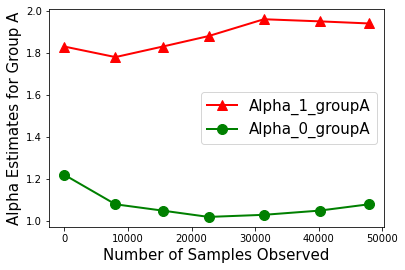

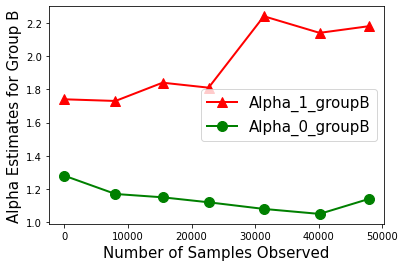

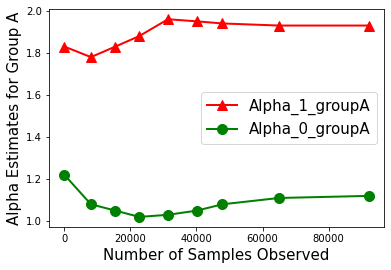

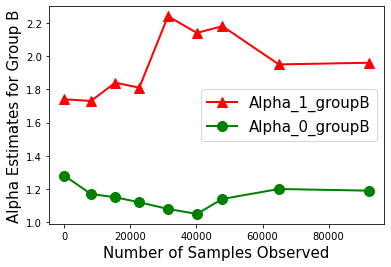

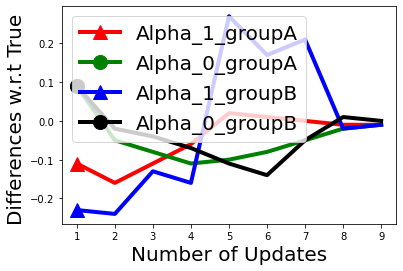

In [18]:
plt.plot(info['Alpha_1_group1'].dropna().index[:len(info['Alpha_1_group1'].dropna())-3],info['Alpha_1_group1'].dropna()[:len(info['Alpha_1_group1'].dropna())-3],
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Alpha_0_group1'].dropna().index[:len(info['Alpha_1_group1'].dropna())-3],info['Alpha_0_group1'].dropna()[:len(info['Alpha_0_group1'].dropna())-3],
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.legend(['Alpha_1_groupA','Alpha_0_groupA'],fontsize=15)
#plt.title("Initial: $B^1_a$(1.83,3.32)/$B^0_a$(1.22,4.99); True: $B^1_a$(1.94,3.32)/$B^0_a$(1.13,4.99)",fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=15)
plt.ylabel('Alpha Estimates for Group A', fontsize=15)
plt.show()

plt.plot(info['Alpha_1_group0'].dropna().index[:len(info['Alpha_1_group1'].dropna())-3],info['Alpha_1_group0'].dropna()[:len(info['Alpha_1_group0'].dropna())-3],
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Alpha_0_group0'].dropna().index[:len(info['Alpha_1_group1'].dropna())-3],info['Alpha_0_group0'].dropna()[:len(info['Alpha_0_group0'].dropna())-3],
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.legend(['Alpha_1_groupB','Alpha_0_groupB'],fontsize=15)
#plt.title("Initial: $B^1_b$(1.74,3.53)/$B^0_b$(1.28,6.10); True: $B^1_b$(1.97,3.53)/$B^0_b$(1.19,6.10)",fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=15)
plt.ylabel('Alpha Estimates for Group B', fontsize=15)
plt.show()



plt.plot(info['Alpha_1_group1'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_1_group1'].dropna()[:len(info['Alpha_1_group1'].dropna())-1],
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Alpha_0_group1'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_0_group1'].dropna()[:len(info['Alpha_0_group1'].dropna())-1],
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.legend(['Alpha_1_groupA','Alpha_0_groupA'],fontsize=15)
#plt.title("Initial: $B^1_a$(1.83,3.32)/$B^0_a$(1.22,4.99); True: $B^1_a$(1.94,3.32)/$B^0_a$(1.13,4.99)",fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=15)
plt.ylabel('Alpha Estimates for Group A', fontsize=15)
plt.show()

plt.plot(info['Alpha_1_group0'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_1_group0'].dropna()[:len(info['Alpha_1_group0'].dropna())-1],
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Alpha_0_group0'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_0_group0'].dropna()[:len(info['Alpha_0_group0'].dropna())-1],
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.legend(['Alpha_1_groupB','Alpha_0_groupB'],fontsize=15)
#plt.title("Initial: $B^1_b$(1.74,3.53)/$B^0_b$(1.28,6.10); True: $B^1_b$(1.97,3.53)/$B^0_b$(1.19,6.10)",fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=15)
plt.ylabel('Alpha Estimates for Group B', fontsize=15)
plt.show()

plt.plot(np.arange(1,len(info['Alpha_1_group1'].dropna())+1,1),info['Alpha_1_group1'].dropna()[:len(info['Alpha_1_group1'].dropna())]-a1_true_group1,
         lw=4,color='red',marker='^',ms=14, markevery=40,markerfacecolor='red')
plt.plot(np.arange(1,len(info['Alpha_0_group1'].dropna())+1,1),info['Alpha_0_group1'].dropna()[:len(info['Alpha_0_group1'].dropna())]-a0_true_group1,
         lw=4,color='green', marker='o',ms=14, markevery=40,markerfacecolor='green')
plt.plot(np.arange(1,len(info['Alpha_1_group0'].dropna())+1,1),info['Alpha_1_group0'].dropna()[:len(info['Alpha_1_group0'].dropna())]-a1_true_group0,
         lw=4,color='blue',marker='^',ms=14, markevery=40,markerfacecolor='blue')
plt.plot(np.arange(1,len(info['Alpha_0_group0'].dropna())+1,1),info['Alpha_0_group0'].dropna()[:len(info['Alpha_0_group0'].dropna())]-a0_true_group0,
         lw=4,color='black', marker='o',ms=14, markevery=40,markerfacecolor='black')
plt.legend(['Alpha_1_groupA','Alpha_0_groupA','Alpha_1_groupB','Alpha_0_groupB'],fontsize=20)
plt.xlabel('Number of Updates', fontsize=20)
plt.ylabel('Differences w.r.t True ', fontsize=20)
plt.show()


In [ ]:
plt.plot(info['Explore_Prob_group1'].dropna().index[:len(info['Explore_Prob_group1'].dropna())],info['Explore_Prob_group1'].dropna()[:len(info['Explore_Prob_group1'].dropna())],
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Explore_Prob_group0'].dropna().index[:len(info['Explore_Prob_group0'].dropna())],info['Explore_Prob_group0'].dropna()[:len(info['Explore_Prob_group0'].dropna())],
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.legend(['Explore_Prob_group1','Explore_Prob_group0'],fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=20)
plt.ylabel('Alpha Estimates for GroupB', fontsize=20)
plt.show()

plt.plot(info['Regret'].dropna().index[:len(info['Regret'].dropna())],info['Regret'].dropna()[:len(info['Regret'].dropna())],
         lw=2,color='red',marker='^',ms=10, markevery=2,markerfacecolor='red')
plt.legend(['Regret'],fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=20)
plt.ylabel('Alpha Estimates for GroupB', fontsize=20)
plt.show()

In [19]:
data = [info['Alpha_1_group1'].dropna(), info['Alpha_0_group1'].dropna(),info['Alpha_1_group0'].dropna(),info['Alpha_0_group0'].dropna()]
df = pd.DataFrame(data=data)
df['True'] = [a1_true_group1,a0_true_group1,a1_true_group0,a0_true_group0]
df.insert(0,'Initial',[a1_init_group1,a0_init_group1,a1_init_group0,a0_init_group0])
df.insert(0,'Total',[len(grouphigh_label1),len(grouphigh_label0),len(grouplow_label1),len(grouplow_label0)])
print (df)

                Total  Initial     0  8024  15435  22670  31360  40119  47857  \
Alpha_1_group1  10607     1.83  1.83  1.78   1.83   1.88   1.96   1.95   1.94   
Alpha_0_group1  31155     1.22  1.22  1.08   1.05   1.02   1.03   1.05   1.08   
Alpha_1_group0   1080     1.74  1.74  1.73   1.84   1.81   2.24   2.14   2.18   
Alpha_0_group0   6000     1.28  1.28  1.17   1.15   1.12   1.08   1.05   1.14   

                64940  92179  107621  True  
Alpha_1_group1   1.93   1.93    1.96  1.94  
Alpha_0_group1   1.11   1.12    1.09  1.13  
Alpha_1_group0   1.95   1.96    1.97  1.97  
Alpha_0_group0   1.20   1.19    1.14  1.19  


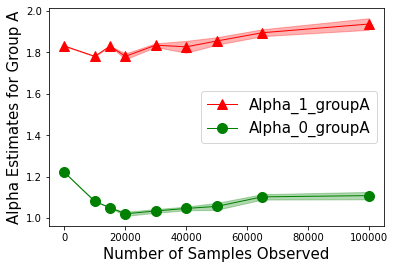

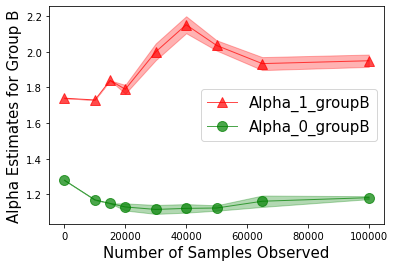

In [949]:
x1 = np.array([0, 10000, 15000, 20000, 30000, 40000, 50000, 65000, 100000])
data_1 = np.array([1.83, 1.83, 1.83, 1.83, 1.83])
mean_1 = np.mean(data_1)
sd_1 = np.std(data_1, ddof=1) 

data_2 = np.array([1.78, 1.78, 1.78, 1.78, 1.78])
mean_2 = np.mean(data_2)
sd_2 = np.std(data_2, ddof=1) 

data_3 = np.array([1.83, 1.83, 1.83, 1.83, 1.83])
mean_3 = np.mean(data_3)
sd_3 = np.std(data_3, ddof=1) 

data_4 = np.array([1.78, 1.8, 1.78, 1.76, 1.78])
mean_4 = np.mean(data_4)
sd_4 = np.std(data_4, ddof=1) 

data_5 = np.array([1.84, 1.82, 1.83, 1.84, 1.84])
mean_5 = np.mean(data_5)
sd_5 = np.std(data_5, ddof=1) 

data_6 = np.array([1.83, 1.86, 1.83, 1.83, 1.78])
mean_6 = np.mean(data_6)
sd_6 = np.std(data_6, ddof=1) 

data_7 = np.array([1.87, 1.87, 1.83, 1.86, 1.84])
mean_7 = np.mean(data_7)
sd_7 = np.std(data_7, ddof=1) 

data_8 = np.array([1.91, 1.89, 1.87, 1.91, 1.89])
mean_8 = np.mean(data_8)
sd_8 = np.std(data_8, ddof=1) 

data_9 = np.array([1.93, 1.95, 1.95, 1.96, 1.89])
mean_9 = np.mean(data_9)
sd_9 = np.std(data_9, ddof=1) 


bdata_1 = np.array([1.22, 1.22, 1.22, 1.22, 1.22])
bmean_1 = np.mean(bdata_1)
bsd_1 = np.std(bdata_1, ddof=1) 

bdata_2 = np.array([1.08, 1.08, 1.08, 1.08, 1.08])
bmean_2 = np.mean(bdata_2)
bsd_2 = np.std(bdata_2, ddof=1) 

bdata_3 = np.array([1.05, 1.05, 1.05, 1.05, 1.05])
bmean_3 = np.mean(bdata_3)
bsd_3 = np.std(bdata_3, ddof=1) 

bdata_4 = np.array([1.02, 1.03, 1.01, 1.03, 1.01])
bmean_4 = np.mean(bdata_4)
bsd_4 = np.std(bdata_4, ddof=1) 

bdata_5 = np.array([1.03, 1.02, 1.04, 1.04, 1.04])
bmean_5 = np.mean(bdata_5)
bsd_5 = np.std(bdata_5, ddof=1) 

bdata_6 = np.array([1.05, 1.04, 1.04, 1.06, 1.04])
bmean_6 = np.mean(bdata_6)
bsd_6 = np.std(bdata_6, ddof=1) 

bdata_7 = np.array([1.08, 1.04, 1.06, 1.04, 1.06])
bmean_7 = np.mean(bdata_7)
bsd_7 = np.std(bdata_7, ddof=1) 

bdata_8 = np.array([1.11, 1.11, 1.1, 1.08, 1.11])
bmean_8 = np.mean(bdata_8)
bsd_8 = np.std(bdata_8, ddof=1) 

bdata_9 = np.array([1.12, 1.08, 1.1, 1.12, 1.12])
bmean_9 = np.mean(bdata_9)
bsd_9 = np.std(bdata_9, ddof=1) 

cdata_1 = np.array([1.74, 1.74, 1.74, 1.74, 1.74])
cmean_1 = np.mean(cdata_1)
csd_1 = np.std(cdata_1, ddof=1) 

cdata_2 = np.array([1.73, 1.73, 1.73, 1.73, 1.73])
cmean_2 = np.mean(cdata_2)
csd_2 = np.std(cdata_2, ddof=1) 

cdata_3 = np.array([1.84, 1.84, 1.84, 1.84, 1.84])
cmean_3 = np.mean(cdata_3)
csd_3 = np.std(cdata_3, ddof=1) 

cdata_4 = np.array([1.81, 1.81, 1.79, 1.75, 1.79])
cmean_4 = np.mean(cdata_4)
csd_4 = np.std(cdata_4, ddof=1) 

cdata_5 = np.array([2.04, 1.92, 2, 2.02, 2.02])
cmean_5 = np.mean(cdata_5)
csd_5 = np.std(cdata_5, ddof=1) 

cdata_6 = np.array([2.14, 2.14, 2.17, 2.22, 2.09])
cmean_6 = np.mean(cdata_6)
csd_6 = np.std(cdata_6, ddof=1) 

cdata_7 = np.array([2.08, 2.01, 2.04, 2.01, 2.04])
cmean_7 = np.mean(cdata_7)
csd_7 = np.std(cdata_7, ddof=1) 

cdata_8 = np.array([1.95, 1.92, 1.99, 1.90, 1.91])
cmean_8 = np.mean(cdata_8)
csd_8 = np.std(cdata_8, ddof=1) 

cdata_9 = np.array([1.96, 1.98, 1.89, 1.96, 1.96])
cmean_9 = np.mean(cdata_9)
csd_9 = np.std(cdata_9, ddof=1) 

ddata_1 = np.array([1.28, 1.28, 1.28, 1.28, 1.28])
dmean_1 = np.mean(ddata_1)
dsd_1 = np.std(ddata_1, ddof=1) 

ddata_2 = np.array([1.17, 1.17, 1.17, 1.17, 1.17])
dmean_2 = np.mean(ddata_2)
dsd_2 = np.std(ddata_2, ddof=1) 

ddata_3 = np.array([1.15, 1.15, 1.15, 1.15, 1.15])
dmean_3 = np.mean(ddata_3)
dsd_3 = np.std(ddata_3, ddof=1) 

ddata_4 = np.array([1.12, 1.14, 1.11, 1.16, 1.12])
dmean_4 = np.mean(ddata_4)
dsd_4 = np.std(ddata_4, ddof=1) 

ddata_5 = np.array([1.08, 1.11, 1.11, 1.14, 1.14])
dmean_5 = np.mean(ddata_5)
dsd_5 = np.std(ddata_5, ddof=1) 

ddata_6 = np.array([1.15, 1.14, 1.12, 1.11, 1.09])
dmean_6 = np.mean(ddata_6)
dsd_6 = np.std(ddata_6, ddof=1) 

ddata_7 = np.array([1.14, 1.14, 1.11, 1.11, 1.12])
dmean_7 = np.mean(ddata_7)
dsd_7 = np.std(ddata_7, ddof=1) 

ddata_8 = np.array([1.2, 1.14, 1.12, 1.17, 1.18])
dmean_8 = np.mean(ddata_8)
dsd_8 = np.std(ddata_8, ddof=1) 

ddata_9 = np.array([1.19, 1.18, 1.17, 1.19, 1.18])
dmean_9 = np.mean(ddata_9)
dsd_9 = np.std(ddata_9, ddof=1) 

line = np.array([mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9])
line_sd = np.array([sd_1, sd_2, sd_3, sd_4, sd_5, sd_6, sd_7, sd_8, sd_9])
plt.plot(x1, line, lw=1,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.fill_between(x1, line+line_sd, line-line_sd, alpha=0.3, color = "red")

line2 = np.array([bmean_1, bmean_2, bmean_3, bmean_4, bmean_5, bmean_6, bmean_7, bmean_8, bmean_9])
line2_sd = np.array([bsd_1, bsd_2, bsd_3, bsd_4, bsd_5, bsd_6, bsd_7, bsd_8, bsd_9])
plt.plot(x1, line2, lw=1,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')

plt.fill_between(x1, line2 - line2_sd, line2 + line2_sd, alpha=0.3, color = "green")
plt.legend(['Alpha_1_groupA','Alpha_0_groupA'],fontsize=15)
#plt.title("Initial: $B^1_a$(1.83,3.32)/$B^0_a$(1.22,4.99); True: $B^1_a$(1.94,3.32)/$B^0_a$(1.13,4.99)",fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=15)
plt.ylabel('Alpha Estimates for Group A', fontsize=15)
plt.show()

line3 = np.array([cmean_1, cmean_2, cmean_3, cmean_4, cmean_5, cmean_6, cmean_7, cmean_8, cmean_9])
line3_sd = np.array([csd_1, csd_2, csd_3, csd_4, csd_5, csd_6, csd_7, csd_8, csd_9])
plt.plot(x1, line3, lw=1,color='red', marker='^',ms=10, markevery=1,markerfacecolor='red',alpha = 0.7)

plt.fill_between(x1, line3 - line3_sd, line3 + line3_sd, alpha=0.3, color = "red")

line3 = np.array([dmean_1, dmean_2, dmean_3, dmean_4, dmean_5, dmean_6, dmean_7, dmean_8, dmean_9])
line3_sd = np.array([dsd_1, dsd_2, dsd_3, dsd_4, dsd_5, dsd_6, dsd_7, dsd_8, dsd_9])
plt.plot(x1, line3, lw=1,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green',alpha = 0.7)

plt.fill_between(x1, line3 - line3_sd, line3 + line3_sd, alpha=0.3, color = "green")
plt.legend(['Alpha_1_groupB','Alpha_0_groupB'],fontsize=15)
#plt.title("Initial: $B^1_b$(1.74,3.53)/$B^0_b$(1.28,6.10); True: $B^1_b$(1.97,3.53)/$B^0_b$(1.19,6.10)",fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=15)
plt.ylabel('Alpha Estimates for Group B', fontsize=15)
plt.show()



# Adaptive Data Debiasing through Bounded Exploraiton and Fairness

This code is under the Gaussian 2 groups with fairness setting

Define true, initial, and other hyper-parameters 

In [830]:
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from statistics import median
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Defining True Parameters
mu_1_true_group1 = 10
mu_0_true_group1 = 7
mu_1_true_group0 = 9
mu_0_true_group0 = 6
sd = 1 

fair_constarint = ['single', 'min_cost', 'independence', 'fnr']
fair = 1
# Defining Initial Assumed Parameters
mu1_init_group1 = 9
mu0_init_group1 = 6
mu1_init_group0 = 8
mu0_init_group0 = 5

true_pop_prob_group1 = 0.65
exploration_porb_group1 = 1
generating_samples_group1 = 15000
existing_1_customers_group1 = 1000
existing_0_customers_group1 = 1000
true_pop_prob_group0 = 0.65
exploration_porb_group0 = 1
generating_samples_group0 = 15000
existing_1_customers_group0 = 1000
existing_0_customers_group0 = 1000
batchsize = 1000
reference_quantile = 0.6

TP_group1 = 0
FP_group1 = 0
FN_group1 = 0
TN_group1 = 0
TP_oracle_group1 = 0 
FP_oracle_group1 = 0
FN_oracle_group1 = 0
TN_oracle_group1 = 0


TP_group0 = 0
FP_group0 = 0
FN_group0 = 0
TN_group0 = 0
TP_oracle_group0 = 0 
FP_oracle_group0 = 0
FN_oracle_group0 = 0
TN_oracle_group0 = 0

Generate initial and incoming data and forget initial/true parameters defined above. From now on, the true and initial parameters are obtained by fitting data into distributions. 

In [831]:
# Generate initial data
data_1_group1 = np.random.normal(mu1_init_group1,sd,size=existing_1_customers_group1)
data_0_group1 = np.random.normal(mu0_init_group1,sd,size=existing_0_customers_group1)
data_1_group0 = np.random.normal(mu1_init_group0,sd,size=existing_1_customers_group0)
data_0_group0 = np.random.normal(mu0_init_group0,sd,size=existing_0_customers_group0)

# Generate incoming true data
label1_group1 = np.random.normal(mu_1_true_group1,sd,size =int(generating_samples_group1*(1-true_pop_prob_group1)))
label0_group1 = np.random.normal(mu_0_true_group1,sd,size =int(generating_samples_group1*true_pop_prob_group1))
label1_group0 = np.random.normal(mu_1_true_group0,sd,size =int(generating_samples_group0*(1-true_pop_prob_group0)))
label0_group0 = np.random.normal(mu_0_true_group0,sd,size =int(generating_samples_group0*true_pop_prob_group0))

# Obtain initial parameters via initial data
mu_1_init_group1, sd = norm.fit(data_1_group1, fscale = sd)
mu_0_init_group1, sd = norm.fit(data_0_group1, fscale = sd)
mu_1_init_group0, sd = norm.fit(data_1_group0, fscale = sd)
mu_0_init_group0, sd = norm.fit(data_0_group0, fscale = sd)

mu_1_group1 = mu_1_init_group1
mu_0_group1 = mu_0_init_group1
mu_1_group0 = mu_1_init_group0
mu_0_group0 = mu_0_init_group0

# Obtain true parameters via incoming true data
mu_1_true_group1, sd = norm.fit(label1_group1, fscale = sd)
mu_0_true_group1, sd = norm.fit(label0_group1, fscale = sd)
mu_1_true_group0, sd = norm.fit(label1_group0, fscale = sd)
mu_0_true_group0, sd = norm.fit(label0_group0, fscale = sd)

Define cost matrix and build confusion matrix given threshold

In [832]:
# Find the confusion matrix given threshold
def CM(Y_test,y_pred,threshold):
    # The Confusion Matrix given a threshold
    y_pred = np.where(y_pred>threshold,1,0)
    cm = pd.DataFrame(confusion_matrix(Y_test,y_pred))
    cm.rename(columns={0:'Pred_neg', 1:'Pred_pos'},
         index = {0:'Actual_neg',1:'Actual_pos'},inplace=True)
    cm['Total'] = cm['Pred_neg'] + cm['Pred_pos'] 
    rowsum = cm.sum()
    rowsum.name = 'Total'
    cm = cm.append(rowsum.transpose())
    
    # TP/TN/FP/FN/TPR/FPR
    P = cm['Total']['Actual_pos']
    N = cm['Total']['Actual_neg']
    TP = cm['Pred_pos']['Actual_pos']
    TN = cm['Pred_neg']['Actual_neg']
    FP = cm['Pred_pos']['Actual_neg']
    FN = cm['Pred_neg']['Actual_pos']
    TPR = np.round(TP/P,2)
    FPR = np.round(FP/N,2)
    return(cm, TPR, FPR)

# Define the cost matrix
COST_MATRIX = [[0, -3/6],
               [0,  3/6]]

# Parameter Description
                                 
| Name        | Description |
| ----------- | ----------- |
| base_rates  | Base rate of label 1 per group       |
| base_rate   | The overall base rate label 1        |
| proportions | Fraction of individuals per group    |
| rocs| ROC per group |

Find the initial classifier threshold and oracle classifier threshold from the initial data and incoming true data respectively. In addition, find out the corresponding LB and UB

In [833]:
# Find fair classifier for the inital training set

# Find the parameters proportions, base_rate and base_rates 
proportions = {'Group1': (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0)), 
               'Group0': 1 - (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))}
base_rate = (len(data_1_group1) + len(data_1_group0))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))
d = {'Group1': len(data_1_group1)/(len(data_1_group1) + len(data_0_group1)), 'Group0': len(data_1_group0)/(len(data_1_group0) + len(data_0_group0))}
base_rates = pd.Series(data = d, index = ['Group1','Group0'])

# Find the ROC curve by construting confusion matrix 
yprob1 = np.append(data_1_group1, data_0_group1)
yprob0 = np.append(data_1_group0, data_0_group0)
  
TPR1 = []
FPR1 = []
threshold1 = [] 
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group1)),np.zeros(len(data_0_group1))),yprob1,(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200)
    TPR1 = TPR1 + [TPR]
    FPR1 = FPR1 + [FPR]
    threshold1 = threshold1 + [(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200]
TPR1 = np.array(TPR1)
FPR1 = np.array(FPR1)
threshold1 = np.array(threshold1)

TPR0 = []
FPR0 = []
threshold0 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group0)),np.zeros(len(data_0_group0))),yprob0,(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200)
    TPR0 = TPR0 + [TPR]
    FPR0 = FPR0 + [FPR]
    threshold0 = threshold0 + [(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200]
TPR0 = np.array(TPR0)
FPR0 = np.array(FPR0)
threshold0 = np.array(threshold0)

# Find the parameter rocs 
rocs = {'Group1': (FPR1, TPR1, threshold1), 'Group0': (FPR0, TPR0,threshold0)}

# Find the initial fairness classifier_1 and classifier_2 
thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)
if fair != 0:
    classifier_group1 = thresholds_data[fair_constarint[fair]][0]['Group1']
    classifier_group0 = thresholds_data[fair_constarint[fair]][0]['Group0']
else: 
    classifier_group1 = thresholds_data[fair_constarint[fair]][0]
    classifier_group0 = thresholds_data[fair_constarint[fair]][0]
print (classifier_group1, classifier_group0)

7.539829949189713 6.438957131896672


In [834]:
# Find oracle fair classifier for the entire data

# Find the parameters proportions, base_rate and base_rates 
proportions = {'Group1': (len(label1_group1) + len(label0_group1))/(len(label1_group1) + len(label0_group1) + len(label1_group0) + len(label0_group0)), 
               'Group0': 1 - (len(label1_group1) + len(label0_group1))/(len(label1_group1) + len(label0_group1) + len(label1_group0) + len(label0_group0))}
base_rate = (len(label1_group1) + len(label1_group0))/(len(label1_group1) + len(label0_group1) + len(label1_group0) + len(label0_group0))
d = {'Group1': len(label1_group1)/(len(label1_group1) + len(label0_group1)), 'Group0': len(label1_group0)/(len(label1_group0) + len(label0_group0))}
base_rates = pd.Series(data = d, index = ['Group1','Group0'])

# Find the ROC curve by construting confusion matrix 
yprob1 = np.append(label1_group1, label0_group1)
yprob0 = np.append(label1_group0, label0_group0)
  
TPR1 = []
FPR1 = []
threshold1 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(label1_group1)),np.zeros(len(label0_group1))),yprob1,(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200)
    TPR1 = TPR1 + [TPR]
    FPR1 = FPR1 + [FPR]
    threshold1 = threshold1 + [(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200]
TPR1 = np.array(TPR1)
FPR1 = np.array(FPR1)
threshold1 = np.array(threshold1)

TPR0 = []
FPR0 = []
threshold0 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(label1_group0)),np.zeros(len(label0_group0))),yprob0,(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200)
    TPR0 = TPR0 + [TPR]
    FPR0 = FPR0 + [FPR]
    threshold0 = threshold0 + [(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200]
TPR0 = np.array(TPR0)
FPR0 = np.array(FPR0)
threshold0 = np.array(threshold0)

# Find the parameter rocs 
rocs = {'Group1': (FPR1, TPR1, threshold1), 'Group0': (FPR0, TPR0, threshold0)}

# Find the initial fairness classifier_1 and classifier_2 
thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)

if fair != 0:
    classifier_oracle_value_1 = thresholds_data[fair_constarint[fair]][0]['Group1']
    classifier_oracle_value_0 = thresholds_data[fair_constarint[fair]][0]['Group0']
else: 
    classifier_oracle_value_1 = thresholds_data[fair_constarint[fair]][0]
    classifier_oracle_value_0 = thresholds_data[fair_constarint[fair]][0]
print (classifier_oracle_value_1, classifier_oracle_value_0)

8.740782113509393 7.5898696227030324


In [835]:
# Find the LB and UB (Using alpha = 60 for label 0 and median for label 1)
temp = 2*norm.cdf(norm.ppf(reference_quantile,mu_0_group1,sd),mu_0_group1,sd) -\
            norm.cdf(classifier_group1,mu_0_group1,sd)
LB_group1 = float(norm.ppf(temp,mu_0_group1,sd))

temp = 2*norm.cdf(mu_1_group1,mu_1_group1,sd) -\
            norm.cdf(LB_group1,mu_1_group1,sd)
UB_group1 = float(norm.ppf(temp,mu_1_group1,sd))

# Find the LB and UB (Using alpha = 60 for label 0 and median for label 1)
temp = 2*norm.cdf(norm.ppf(reference_quantile,mu_0_group0,sd),mu_0_group0,sd) -\
            norm.cdf(classifier_group0,mu_0_group0,sd)
LB_group0 = float(norm.ppf(temp,mu_0_group0,sd))

temp = 2*norm.cdf(mu_1_group0,mu_1_group0,sd) -\
            norm.cdf(LB_group0,mu_1_group0,sd)
UB_group0 = float(norm.ppf(temp,mu_1_group0,sd))

Build the info dataframe, which contains the information of ('True Label','Values','Decision','RP_1','RP_0', 'Classifier','Regret','Explore_Prob')

In [836]:
info_group1 = pd.DataFrame(columns = ['True Label','Values','Decision','RP_1_group1','RP_0_group1',
                                      'Classifier_group1', 'RP_1_group0','RP_0_group0',
                                      'Classifier_group0', 'Group Num', 'Regret','Explore_Prob_group1', 'Explore_Prob_group0'])

# Assign feature values to the dataframe
info_group1['Values'] = np.concatenate((label1_group1, label0_group1, label1_group0, label0_group0))
# Assign true labels to the dataframe
info_group1.loc[0:len(label1_group1),'True Label'] = 1
info_group1.loc[len(label1_group1):(len(label1_group1)+len(label0_group1)),'True Label'] = 0
info_group1.loc[(len(label1_group1)+len(label0_group1)):(len(label1_group1)+len(label0_group1)+ len(label1_group0)),'True Label'] = 1
info_group1.loc[(len(label1_group1)+len(label0_group1)+ len(label1_group0)): ,'True Label'] = 0
# Assign group number to the dataframe
info_group1.loc[0:(len(label1_group1)+len(label0_group1)),'Group Num'] = 1
info_group1.loc[(len(label1_group1)+len(label0_group1)):,'Group Num'] = 0
# Shuffle the dataframe
info_group1 = shuffle(info_group1)
# Resign the index 
info_group1.reset_index(inplace=True, drop=True)

Perform the parameter update once the size of data falling into the updating range reaches the batchsize

In [837]:
i = 0
# Create loop for updating
while (i <= len(info_group1)-1):
    data_1_trun_group1 = []
    data_0_trun_group1 = []
    data_1_trun_group0 = []
    data_0_trun_group0 = []
    
    # find quantile of reference point including label 0 tail for group 1
    portion_right0_group1 = norm.sf(norm.ppf(reference_quantile,mu_0_group1,sd),mu_0_group1,sd)/norm.sf(LB_group1,mu_0_group1,sd)
    portion_left0_group1 = 1 - portion_right0_group1
    
    portion_right1_group1 = norm.sf(norm.ppf(reference_quantile,mu_1_group1,sd),mu_1_group1,sd)/norm.sf(LB_group1,mu_1_group1,sd)
    portion_left1_group1 = 1 - portion_right1_group1
    
    # find quantile of reference point including label 0 tail for group 0
    portion_right0_group0 = norm.sf(norm.ppf(reference_quantile,mu_0_group0,sd),mu_0_group0,sd)/norm.sf(LB_group0,mu_0_group0,sd)
    portion_left0_group0 = 1 - portion_right0_group0
    
    portion_right1_group0 = norm.sf(norm.ppf(reference_quantile,mu_1_group0,sd),mu_1_group0,sd)/norm.sf(LB_group0,mu_1_group0,sd)
    portion_left1_group0 = 1 - portion_right1_group0
    
    k1_group1 = len(data_1_trun_group1)
    k0_group1 = len(data_0_trun_group1)
    k1_group0 = len(data_1_trun_group0)
    k0_group0 = len(data_0_trun_group0)
    
    #loop into each batch
    while ((min(k1_group1, k0_group1, k1_group0, k0_group0) <= batchsize) & (i <= len(info_group1)-1)):
        
        if info_group1.loc[i,'Group Num'] == 1:

            # Make decisions
            if (info_group1.loc[i,'Values'] >= classifier_group1) & (info_group1.loc[i,'Values']<=UB_group1):
                info_group1.loc[i,'Decision'] = 1
            elif (info_group1.loc[i,'Values'] < classifier_group1) & (info_group1.loc[i,'Values']>=LB_group1) & (np.random.uniform(size=1)<=exploration_porb_group1):
                info_group1.loc[i,'Decision'] = 1
            elif (info_group1.loc[i,'Values'] >= classifier_group1) & (info_group1.loc[i,'Values']>UB_group1):
                info_group1.loc[i,'Decision'] = 1
            elif (info_group1.loc[i,'Values'] < classifier_group1) & (info_group1.loc[i,'Values']<LB_group1):
                info_group1.loc[i,'Decision'] = 3
            else:
                info_group1.loc[i,'Decision'] = 0   

            # Record confusion matrix
            if (info_group1.loc[i,'True Label']==1) & ((info_group1.loc[i,'Decision']==1) or (info_group1.loc[i,'Decision']==2)):
                TP_group1 += 1
            elif (info_group1.loc[i,'True Label']==1) & ((info_group1.loc[i,'Decision']==0) or (info_group1.loc[i,'Decision']==3)):
                FN_group1 += 1
            elif (info_group1.loc[i,'True Label']==0) & ((info_group1.loc[i,'Decision']==0) or (info_group1.loc[i,'Decision']==3)):
                TN_group1 += 1
            else:
                FP_group1 += 1

            # Record oracle matrix
            if (info_group1.loc[i,'Values'] >= classifier_oracle_value_1) & (info_group1.loc[i,'True Label']==1):
                TP_oracle_group1 += 1
            elif (info_group1.loc[i,'Values'] >= classifier_oracle_value_1) & (info_group1.loc[i,'True Label']==0):
                FP_oracle_group1 += 1
            elif (info_group1.loc[i,'Values'] < classifier_oracle_value_1) & (info_group1.loc[i,'True Label']==1):
                FN_oracle_group1 += 1
            else:
                TN_oracle_group1 += 1


            # Record label 1 information for updating
            if (info_group1.loc[i,'True Label']==1) & ((info_group1.loc[i,'Decision']==1) or (info_group1.loc[i,'Decision']==2)):
                data_1_group1 = np.append(data_1_group1, info_group1.loc[i,'Values'])
                if (((info_group1.loc[i,'Values'] < classifier_group1) & (info_group1.loc[i,'Decision']==1)) 
                   or ((info_group1.loc[i,'Values'] >= classifier_group1) & (info_group1.loc[i,'Decision']==1) & (np.random.uniform(size=1)<=exploration_porb_group1))):
                    data_1_trun_group1 = np.append(data_1_trun_group1, info_group1.loc[i,'Values'])
            else:
                data_1_group1 = data_1_group1 
                data_1_trun_group1 = data_1_trun_group1


            # Record label 0 information for updating
            if (info_group1.loc[i,'True Label']==0) & ((info_group1.loc[i,'Decision']==1) or (info_group1.loc[i,'Decision']==2)):
                data_0_group1 = np.append(data_0_group1, info_group1.loc[i,'Values'])
                if (((info_group1.loc[i,'Values'] < classifier_group1) & (info_group1.loc[i,'Decision']==1)) 
                    or ((info_group1.loc[i,'Values'] >= classifier_group1) & (np.random.uniform(size=1)<=exploration_porb_group1))):
                    data_0_trun_group1 = np.append(data_0_trun_group1, info_group1.loc[i,'Values'])
            else:
                data_0_group1 = data_0_group1 
                data_0_trun_group1 = data_0_trun_group1 
        else:
            
            # Make decisions
            if (info_group1.loc[i,'Values'] >= classifier_group0) & (info_group1.loc[i,'Values']<=UB_group0):
                info_group1.loc[i,'Decision'] = 1
            elif (info_group1.loc[i,'Values'] < classifier_group0) & (info_group1.loc[i,'Values']>=LB_group0) & (np.random.uniform(size=1)<=exploration_porb_group0):
                info_group1.loc[i,'Decision'] = 1
            elif (info_group1.loc[i,'Values'] >= classifier_group0) & (info_group1.loc[i,'Values']>UB_group0):
                info_group1.loc[i,'Decision'] = 1
            elif (info_group1.loc[i,'Values'] < classifier_group0) & (info_group1.loc[i,'Values']<LB_group0):
                info_group1.loc[i,'Decision'] = 3
            else:
                info_group1.loc[i,'Decision'] = 0   

            # Record confusion matrix
            if (info_group1.loc[i,'True Label']==1) & ((info_group1.loc[i,'Decision']==1) or (info_group1.loc[i,'Decision']==2)):
                TP_group0 += 1
            elif (info_group1.loc[i,'True Label']==1) & ((info_group1.loc[i,'Decision']==0) or (info_group1.loc[i,'Decision']==3)):
                FN_group0 += 1
            elif (info_group1.loc[i,'True Label']==0) & ((info_group1.loc[i,'Decision']==0) or (info_group1.loc[i,'Decision']==3)):
                TN_group0 += 1
            else:
                FP_group0 += 1

            # Record oracle matrix
            if (info_group1.loc[i,'Values'] >= classifier_oracle_value_0) & (info_group1.loc[i,'True Label']==1):
                TP_oracle_group0 += 1
            elif (info_group1.loc[i,'Values'] >= classifier_oracle_value_0) & (info_group1.loc[i,'True Label']==0):
                FP_oracle_group0 += 1
            elif (info_group1.loc[i,'Values'] < classifier_oracle_value_0) & (info_group1.loc[i,'True Label']==1):
                FN_oracle_group0 += 1
            else:
                TN_oracle_group0 += 1


            # Record label 1 information for updating
            if (info_group1.loc[i,'True Label']==1) & ((info_group1.loc[i,'Decision']==1) or (info_group1.loc[i,'Decision']==2)):
                data_1_group0 = np.append(data_1_group0, info_group1.loc[i,'Values'])
                if (((info_group1.loc[i,'Values'] < classifier_group0) & (info_group1.loc[i,'Decision']==1)) 
                   or ((info_group1.loc[i,'Values'] >= classifier_group0) & (info_group1.loc[i,'Decision']==1) & (np.random.uniform(size=1)<=exploration_porb_group0))):
                    data_1_trun_group0 = np.append(data_1_trun_group0, info_group1.loc[i,'Values'])
            else:
                data_1_group0 = data_1_group0 
                data_1_trun_group0 = data_1_trun_group0


            # Record label 0 information for updating
            if (info_group1.loc[i,'True Label']==0) & ((info_group1.loc[i,'Decision']==1) or (info_group1.loc[i,'Decision']==2)):
                data_0_group0 = np.append(data_0_group0, info_group1.loc[i,'Values'])
                if (((info_group1.loc[i,'Values'] < classifier_group0) & (info_group1.loc[i,'Decision']==1)) 
                    or ((info_group1.loc[i,'Values'] >= classifier_group0) & (np.random.uniform(size=1)<=exploration_porb_group0))):
                    data_0_trun_group0 = np.append(data_0_trun_group0, info_group1.loc[i,'Values'])
            else:
                data_0_group0 = data_0_group0
                data_0_trun_group0 = data_0_trun_group0
             
        
        k1_group1 = len(data_1_trun_group1)
        k0_group1 = len(data_0_trun_group1)
        k1_group0 = len(data_1_trun_group0)
        k0_group0 = len(data_0_trun_group0)
        i = i + 1
        
    # Record new mean value/RP and classifier
    info_group1.loc[i-1,'RP_1_group1'] = np.quantile(data_1_trun_group1, portion_left1_group1) - norm.ppf(reference_quantile,0,sd) #median(data_1_trun_group1)
    info_group1.loc[i-1,'RP_0_group1'] =  np.quantile(data_0_trun_group1, portion_left0_group1) - norm.ppf(reference_quantile,0,sd)
    info_group1.loc[i-1,'Classifier_group1'] = classifier_group1
    info_group1.loc[i-1,'Explore_Prob_group1'] = exploration_porb_group1
        
    info_group1.loc[i-1,'RP_1_group0'] = np.quantile(data_1_trun_group0, portion_left1_group0) - norm.ppf(reference_quantile,0,sd) #median(data_1_trun_group0)
    info_group1.loc[i-1,'RP_0_group0'] =  np.quantile(data_0_trun_group0, portion_left0_group0) - norm.ppf(reference_quantile,0,sd)
    info_group1.loc[i-1,'Classifier_group0'] = classifier_group0
    info_group1.loc[i-1,'Explore_Prob_group0'] = exploration_porb_group0
    info_group1.loc[i-1,'Regret'] = (FP_group1 + FN_group1 + FP_group0 + FN_group0)-(FP_oracle_group1 + FN_oracle_group1 + FP_oracle_group0 + FN_oracle_group0)

    # Reassign new values to parameters
    mu_1_group1 = info_group1.loc[i-1,'RP_1_group1']
    mu_0_group1 = info_group1.loc[i-1,'RP_0_group1']
    mu_1_group0 = info_group1.loc[i-1,'RP_1_group0']
    mu_0_group0 = info_group1.loc[i-1,'RP_0_group0']
    
    
    # Find the parameters proportions, base_rate and base_rates 
    proportions = {'Group1': (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0)), 
                   'Group0': 1 - (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))}
    base_rate = (len(data_1_group1) + len(data_1_group0))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))
    d = {'Group1': len(data_1_group1)/(len(data_1_group1) + len(data_0_group1)), 'Group0': len(data_1_group0)/(len(data_1_group0) + len(data_0_group0))}
    base_rates = pd.Series(data = d, index = ['Group1','Group0'])

    # Find the ROC curve by construting confusion matrix 
    yprob1 = np.append(data_1_group1, data_0_group1)
    yprob0 = np.append(data_1_group0, data_0_group0)

    TPR1 = []
    FPR1 = []
    threshold1 = []
    for threshold in range(201,0,-1):
        cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group1)),np.zeros(len(data_0_group1))),yprob1,(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200)
        TPR1 = TPR1 + [TPR]
        FPR1 = FPR1 + [FPR]
        threshold1 = threshold1 + [(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200]
    TPR1 = np.array(TPR1)
    FPR1 = np.array(FPR1)
    threshold1 = np.array(threshold1)

    TPR0 = []
    FPR0 = []
    threshold0 = []
    for threshold in range(201,0,-1):
        cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group0)),np.zeros(len(data_0_group0))),yprob0,(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200)
        TPR0 = TPR0 + [TPR]
        FPR0 = FPR0 + [FPR]
        threshold0 = threshold0 + [(mu_0_true_group0-3*sd)+(mu_1_true_group1+3*sd - mu_0_true_group0+3*sd)*threshold/200]
    TPR0 = np.array(TPR0)
    FPR0 = np.array(FPR0)
    threshold0 = np.array(threshold0)

    # Find the parameter rocs 
    rocs = {'Group1': (FPR1, TPR1, threshold1), 'Group0': (FPR0, TPR0,threshold0)}

    # Find the initial fairness classifier_1 and classifier_2 
    thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)
    
    if fair != 0:
        classifier_group1 = thresholds_data[fair_constarint[fair]][0]['Group1']
        classifier_group0 = thresholds_data[fair_constarint[fair]][0]['Group0']
    else: 
        classifier_group1 = thresholds_data[fair_constarint[fair]][0]
        classifier_group0 = thresholds_data[fair_constarint[fair]][0]
        
    # Find the LB and UB (Using alpha = 60 for label 0 and median for label 1)
    temp = 2*norm.cdf(norm.ppf(reference_quantile,mu_0_group1,sd),mu_0_group1,sd) -\
                norm.cdf(classifier_group1,mu_0_group1,sd)
    LB_group1 = float(norm.ppf(temp,mu_0_group1,sd))

    temp = 2*norm.cdf(mu_1_group1,mu_1_group1,sd) -\
                norm.cdf(LB_group1,mu_1_group1,sd)
    UB_group1 = float(norm.ppf(temp,mu_1_group1,sd))

    # Find the LB and UB (Using alpha = 60 for label 0 and median for label 1)
    temp = 2*norm.cdf(norm.ppf(reference_quantile,mu_0_group0,sd),mu_0_group0,sd) -\
                norm.cdf(classifier_group0,mu_0_group0,sd)
    LB_group0 = float(norm.ppf(temp,mu_0_group0,sd))

    temp = 2*norm.cdf(mu_1_group0,mu_1_group0,sd) -\
                norm.cdf(LB_group0,mu_1_group0,sd)
    UB_group0 = float(norm.ppf(temp,mu_1_group0,sd))

 
    theoretical_value = norm.sf(classifier_group1,mu_0_group1,sd)/norm.sf(LB_group1,mu_0_group1,sd)
    experiment_value = len(data_0_trun_group1[data_0_trun_group1>=classifier_group1])/len(data_0_trun_group1[data_0_trun_group1>=LB_group1])
    diff = abs(theoretical_value - experiment_value)
    exploration_porb_group1 = 1 - 0.1*(i//((generating_samples_group1+generating_samples_group0)/10))
    
    theoretical_value = norm.sf(classifier_group0,mu_0_group0,sd)/norm.sf(LB_group0,mu_0_group0,sd)
    experiment_value = len(data_0_trun_group0[data_0_trun_group0>=classifier_group0])/len(data_0_trun_group0[data_0_trun_group0>=LB_group0])
    diff = abs(theoretical_value - experiment_value)
    exploration_porb_group0 = 1 - 0.1*(i//((generating_samples_group1+generating_samples_group0)/10))

In [838]:
# Add initial information to thhe DataFrame
initial_information = []
initial_information.insert(0, {'True Label': 'NA','Values': 'NA','Decision': 'NA','RP_1_group1': mu_1_init_group1,'RP_0_group1': mu_0_init_group1,
                               'Classifier_group1': 'NA','RP_1_group0':mu_1_init_group0,'RP_0_group0':mu_0_init_group0,'Classifier_group0': 'NA',
                               'Group Num': 'NA', 'Regret': 0,'Explore_Prob_group1':1, 'Explore_Prob_group0':1})
info_group1 = pd.concat([pd.DataFrame(initial_information), info_group1], ignore_index=True)

Performance visualization

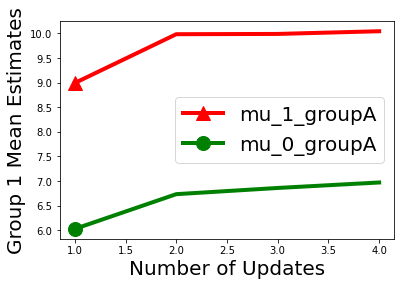

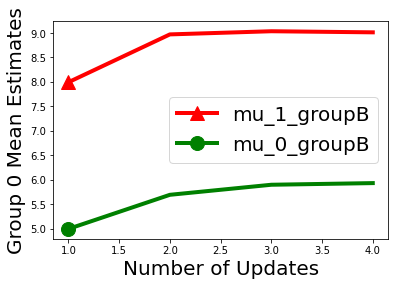

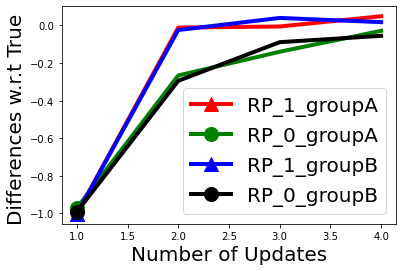

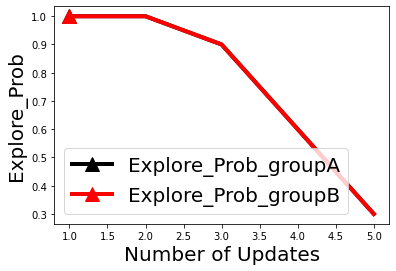

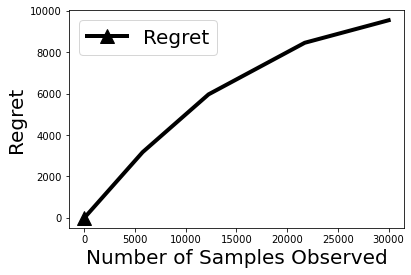

In [839]:
plt.plot(np.arange(1,len(info_group1['RP_1_group1'].dropna()),1),info_group1['RP_1_group1'].dropna()[:len(info_group1['RP_1_group1'].dropna())-1],
         lw=4,color='red',marker='^',ms=14, markevery=40,markerfacecolor='red')
plt.plot(np.arange(1,len(info_group1['RP_0_group1'].dropna()),1),info_group1['RP_0_group1'].dropna()[:len(info_group1['RP_0_group1'].dropna())-1],
         lw=4,color='green', marker='o',ms=14, markevery=40,markerfacecolor='green')
plt.legend(['mu_1_groupA','mu_0_groupA'],fontsize=20)
plt.xlabel('Number of Updates', fontsize=20)
plt.ylabel('Group 1 Mean Estimates', fontsize=20)
plt.show()

plt.plot(np.arange(1,len(info_group1['RP_1_group0'].dropna()),1),info_group1['RP_1_group0'].dropna()[:len(info_group1['RP_1_group0'].dropna())-1],
         lw=4,color='red',marker='^',ms=14, markevery=40,markerfacecolor='red')
plt.plot(np.arange(1,len(info_group1['RP_0_group0'].dropna()),1),info_group1['RP_0_group0'].dropna()[:len(info_group1['RP_0_group0'].dropna())-1],
         lw=4,color='green', marker='o',ms=14, markevery=40,markerfacecolor='green')
plt.legend(['mu_1_groupB','mu_0_groupB'],fontsize=20)
plt.xlabel('Number of Updates', fontsize=20)
plt.ylabel('Group 0 Mean Estimates', fontsize=20)
plt.show()

plt.plot(np.arange(1,len(info_group1['RP_1_group1'].dropna()),1),info_group1['RP_1_group1'].dropna()[:len(info_group1['RP_1_group1'].dropna())-1]-mu_1_true_group1,
         lw=4,color='red',marker='^',ms=14, markevery=40,markerfacecolor='red')
plt.plot(np.arange(1,len(info_group1['RP_0_group1'].dropna()),1),info_group1['RP_0_group1'].dropna()[:len(info_group1['RP_0_group1'].dropna())-1]-mu_0_true_group1,
         lw=4,color='green', marker='o',ms=14, markevery=40,markerfacecolor='green')
plt.plot(np.arange(1,len(info_group1['RP_1_group0'].dropna()),1),info_group1['RP_1_group0'].dropna()[:len(info_group1['RP_1_group0'].dropna())-1]-mu_1_true_group0,
         lw=4,color='blue',marker='^',ms=14, markevery=40,markerfacecolor='blue')
plt.plot(np.arange(1,len(info_group1['RP_0_group0'].dropna()),1),info_group1['RP_0_group0'].dropna()[:len(info_group1['RP_0_group0'].dropna())-1]-mu_0_true_group0,
         lw=4,color='black', marker='o',ms=14, markevery=40,markerfacecolor='black')
plt.legend(['RP_1_groupA','RP_0_groupA','RP_1_groupB','RP_0_groupB'],fontsize=20)
plt.xlabel('Number of Updates', fontsize=20)
plt.ylabel('Differences w.r.t True ', fontsize=20)
plt.show()

plt.plot(np.arange(1,len(info_group1['Explore_Prob_group1'].dropna())+1,1),info_group1['Explore_Prob_group1'].dropna(),lw=4,color='black',marker='^',ms=14, markevery=40,markerfacecolor='black')
plt.plot(np.arange(1,len(info_group1['Explore_Prob_group0'].dropna())+1,1),info_group1['Explore_Prob_group0'].dropna(),lw=4,color='red',marker='^',ms=14, markevery=40,markerfacecolor='red')
plt.legend(['Explore_Prob_groupA','Explore_Prob_groupB'],fontsize=20)
plt.xlabel('Number of Updates', fontsize=20)
plt.ylabel('Explore_Prob', fontsize=20)
plt.show()

plt.plot(info_group1['Regret'].dropna().index,info_group1['Regret'].dropna(),lw=4,color='black',marker='^',ms=14, markevery=40,markerfacecolor='black')
plt.legend(['Regret'],fontsize=20)
plt.xlabel('Number of Samples Observed', fontsize=20)
plt.ylabel('Regret', fontsize=20)
plt.show()

In [840]:
info_group1.to_csv('Gaussian_two_groups_fairNO.csv')
#object_name = pd.read_csv('file_name.csv')

# FICO Data

In [31]:
from random import choices
population = FICO['pdf'].index.tolist()
weights_asian = FICO['pdf']['Asian'].values
weights_black = FICO['pdf']['Black'].values
weights_hispanic = FICO['pdf']['Hispanic'].values
weights_white = FICO['pdf']['White'].values

# Generate data according to pdf
asian_data = choices(population, weights_asian, k=7906)
black_data = choices(population, weights_black, k=18274)
hispanic_data = choices(population, weights_hispanic, k=14702)
white_data = choices(population, weights_white, k=133165)

values_asian, asian_count = np.unique(asian_data, return_counts=True)
values_black, black_count = np.unique(black_data, return_counts=True)
values_hispanic, hispanic_count = np.unique(hispanic_data, return_counts=True)
values_white, white_count = np.unique(white_data, return_counts=True)

asian_1_count = np.around(asian_count * (FICO['performance']['Asian'].values[1:]))
asian_0_count = np.around(asian_count * (1 - FICO['performance']['Asian'].values[1:]))

asian_1 = []
for index, number in enumerate(values_asian):
    j = 0
    while (j < asian_1_count[index]):
        asian_1 = asian_1 + [number]
        j = j + 1
asian_0 = []
for index, number in enumerate(values_asian):
    j = 0
    while (j < asian_0_count[index]):
        asian_0 = asian_0 + [number]
        j = j + 1

black_1_count = np.around(black_count * (FICO['performance']['Black'].values[:197]))
black_0_count = np.around(black_count * (1 - FICO['performance']['Black'].values[:197]))

black_1 = []
for index, number in enumerate(values_black):
    j = 0
    while (j < black_1_count[index]):
        black_1 = black_1 + [number]
        j = j + 1
black_0 = []
for index, number in enumerate(values_black):
    j = 0
    while (j < black_0_count[index]):
        black_0 = black_0 + [number]
        j = j + 1

hispanic_1_count = np.around(hispanic_count * (FICO['performance']['Hispanic'].values[:197]))
hispanic_0_count = np.around(hispanic_count * (1 - FICO['performance']['Hispanic'].values[:197]))

hispanic_1 = []
for index, number in enumerate(values_hispanic):
    j = 0
    while (j < hispanic_1_count[index]):
        hispanic_1 = hispanic_1 + [number]
        j = j + 1
hispanic_0 = []
for index, number in enumerate(values_hispanic):
    j = 0
    while (j < hispanic_0_count[index]):
        hispanic_0 = hispanic_0 + [number]
        j = j + 1

white_1_count = np.around(white_count * (FICO['performance']['White'].values))
white_0_count = np.around(white_count * (1 - FICO['performance']['White'].values))

white_1 = []
for index, number in enumerate(values_white):
    j = 0
    while (j < white_1_count[index]):
        white_1 = white_1 + [number]
        j = j + 1
white_0 = []
for index, number in enumerate(values_white):
    j = 0
    while (j < white_0_count[index]):
        white_0 = white_0 + [number]
        j = j + 1

# Form two groups White and Nonwhite
# white_1 and white_0
Nonwhite_1 = black_1 + hispanic_1 + asian_1
Nonwhite_0 = black_0 + hispanic_0 + asian_0

In [34]:
from scipy.stats import beta
fair_constarint = ['single', 'min_cost', 'independence', 'fnr']
fair = 3

min_groups = -0.5
max_groups = 101
reference_quantile_0 = 0.5
reference_quantile_1 = 0.5
batchsize = 1000
exploration_porb_group1 = 1
exploration_porb_group0 = 1

TP_group1 = 0
FP_group1 = 0
FN_group1 = 0
TN_group1 = 0
TP_group0 = 0
FP_group0 = 0
FN_group0 = 0
TN_group0 = 0

TP_oracle_group1 = 0 
FP_oracle_group1 = 0
FN_oracle_group1 = 0
TN_oracle_group1 = 0
TP_oracle_group0 = 0 
FP_oracle_group0 = 0
FN_oracle_group0 = 0
TN_oracle_group0 = 0

a,b1_true_group1,c,d = beta.fit(white_1, floc = min_groups, fscale = max_groups - min_groups)
a,b0_true_group1,c,d = beta.fit(white_0, floc = min_groups, fscale = max_groups - min_groups)
a,b1_true_group0,c,d = beta.fit(Nonwhite_1, floc = min_groups, fscale = max_groups - min_groups)
a,b0_true_group0,c,d = beta.fit(Nonwhite_0, floc = min_groups, fscale = max_groups - min_groups)

b1_group1 = b1_true_group1
b0_group1 = b0_true_group1
b1_group0 = b1_true_group0
b0_group0 = b0_true_group0

# Find the true parameters
x = np.arange(0.01,10,0.01)

def f(alpha):
    return abs(beta.cdf(np.quantile(white_1,reference_quantile_1), alpha, b1_group1, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_1)
a1_true_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(white_0,reference_quantile_0), alpha, b0_group1, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_0)
a0_true_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Nonwhite_1,reference_quantile_1), alpha, b1_group0, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_1)
a1_true_group0 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Nonwhite_0,reference_quantile_0), alpha, b0_group0, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_0)
a0_true_group0 = np.argmin(f(x))*0.01

In [35]:
info = pd.DataFrame(columns = ['True Label','Values','Decision','RP_1_group1','RP_0_group1',
                                      'Classifier_group1','Explore_Prob_group1','RP_1_group0','RP_0_group0',
                                      'Classifier_group0','Explore_Prob_group0','Alpha_1_group1','Alpha_0_group1',
                                       'Alpha_1_group0','Alpha_0_group0','Regret'])


# Assign feature values to the dataframe
info['Values'] = np.concatenate((Nonwhite_1, Nonwhite_0, white_1, white_0))
# Assign true labels to the dataframe
info.loc[0:len(Nonwhite_1),'True Label'] = 1
info.loc[len(Nonwhite_1):(len(Nonwhite_1)+len(Nonwhite_0)),'True Label'] = 0
info.loc[(len(Nonwhite_1)+len(Nonwhite_0)):(len(Nonwhite_1)+len(Nonwhite_0)+len(white_1)),'True Label'] = 1
info.loc[(len(Nonwhite_1)+len(Nonwhite_0)+len(white_1)): ,'True Label'] = 0

# Assign group number to the dataframe
info.loc[0:(len(Nonwhite_1)+len(Nonwhite_0)),'Group Num'] = 0
info.loc[(len(Nonwhite_1)+len(Nonwhite_0)): ,'Group Num'] = 1

# Shuffle the dataframe
info = shuffle(info)
# Resign the index 
info.reset_index(inplace=True, drop=True)

In [36]:
# Select first (Initial_fit_portion) rows to find initial assumed distribution
Initial_fit_portion = 0.003

First_n_data = info.head(round(Initial_fit_portion*len(info)))
Initial_white1 = First_n_data[(First_n_data["True Label"]==1) & (First_n_data["Group Num"]==1)]["Values"]
Initial_white0 = First_n_data[(First_n_data["True Label"]==0) & (First_n_data["Group Num"]==1)]["Values"]
Initial_nonwhite1 = First_n_data[(First_n_data["True Label"]==1) & (First_n_data["Group Num"]==0)]["Values"]
Initial_nonwhite0 = First_n_data[(First_n_data["True Label"]==0) & (First_n_data["Group Num"]==0)]["Values"]
print (len(Initial_white1), len(Initial_white0), len(Initial_nonwhite1), len(Initial_nonwhite0))

307 84 71 60


In [37]:
# Find the initial parameters
x = np.arange(0.01,10,0.01)

def f(alpha):
    return abs(beta.cdf(np.quantile(Initial_white1,reference_quantile_1), alpha, b1_group1, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_1)
a1_init_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Initial_white0,reference_quantile_0), alpha, b0_group1, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_0)
a0_init_group1 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Initial_nonwhite1,reference_quantile_1), alpha, b1_group0, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_1)
a1_init_group0 = np.argmin(f(x))*0.01

def f(alpha):
    return abs(beta.cdf(np.quantile(Initial_nonwhite0,reference_quantile_0), alpha, b0_group0, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_0)
a0_init_group0 = np.argmin(f(x))*0.01

a1_group1 = a1_init_group1
a0_group1 = a0_init_group1
a1_group0 = a1_init_group0
a0_group0 = a0_init_group0
info = info.tail(round((1-Initial_fit_portion)*len(info)))
# Resign the index 
info.reset_index(inplace=True, drop=True)

In [38]:
data_1_group1 = Initial_white1
data_0_group1 = Initial_white0
data_1_group0 = Initial_nonwhite1
data_0_group0 = Initial_nonwhite0

data_1_group1.reset_index(inplace=True, drop=True)
data_0_group1.reset_index(inplace=True, drop=True)
data_1_group0.reset_index(inplace=True, drop=True)
data_0_group0.reset_index(inplace=True, drop=True)

In [39]:
# Find the confusion matrix given threshold
def CM(Y_test,y_pred,threshold):
    # The Confusion Matrix given a threshold
    y_pred = np.where(y_pred>threshold,1,0)
    cm = pd.DataFrame(confusion_matrix(Y_test,y_pred))
    cm.rename(columns={0:'Pred_neg', 1:'Pred_pos'},
         index = {0:'Actual_neg',1:'Actual_pos'},inplace=True)
    cm['Total'] = cm['Pred_neg'] + cm['Pred_pos'] 
    rowsum = cm.sum()
    rowsum.name = 'Total'
    cm = cm.append(rowsum.transpose())
    
    # TP/TN/FP/FN/TPR/FPR
    P = cm['Total']['Actual_pos']
    N = cm['Total']['Actual_neg']
    TP = cm['Pred_pos']['Actual_pos']
    TN = cm['Pred_neg']['Actual_neg']
    FP = cm['Pred_pos']['Actual_neg']
    FN = cm['Pred_neg']['Actual_pos']
    TPR = np.round(TP/P,2)
    FPR = np.round(FP/N,2)
    return(cm, TPR, FPR)

# Define the cost matrix
COST_MATRIX = [[0, -3/6],
               [0,  3/6]]

In [40]:
# Find initial fair classifier for the inital training set

# Find the parameters proportions, base_rate and base_rates 
proportions = {'White': (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0)), 
               'Non-White': 1 - (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))}

proportions = {'White': (len(white_1) + len(white_0))/(len(white_1) + len(white_0) + len(Nonwhite_1) + len(Nonwhite_0)), 
               'Non-White': 1 - (len(white_1) + len(white_0))/(len(white_1) + len(white_0) + len(Nonwhite_1) + len(Nonwhite_0))}

base_rate = (len(data_1_group1) + len(data_1_group0))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))
d = {'White': len(data_1_group1)/(len(data_1_group1) + len(data_0_group1)), 'Non-White': len(data_1_group0)/(len(data_1_group0) + len(data_0_group0))}
base_rates = pd.Series(data = d, index = ['White','Non-White'])

# Find the ROC curve by construting confusion matrix 
yprob1 = np.append(data_1_group1, data_0_group1)
yprob0 = np.append(data_1_group0, data_0_group0)
  
TPR1 = []
FPR1 = []
threshold1 = [] 
for threshold in range(200,-1,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group1)),np.zeros(len(data_0_group1))),yprob1,threshold/2)
    TPR1 = TPR1 + [TPR]
    FPR1 = FPR1 + [FPR]
    threshold1 = threshold1 + [threshold/2]
TPR1 = np.array(TPR1)
FPR1 = np.array(FPR1)
threshold1 = np.array(threshold1)

TPR0 = []
FPR0 = []
threshold0 = []
for threshold in range(200,-1,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group0)),np.zeros(len(data_0_group0))),yprob0,threshold/2)
    TPR0 = TPR0 + [TPR]
    FPR0 = FPR0 + [FPR]
    threshold0 = threshold0 + [threshold/2]
TPR0 = np.array(TPR0)
FPR0 = np.array(FPR0)
threshold0 = np.array(threshold0)

# Find the parameter rocs 
rocs = {'White': (FPR1, TPR1, threshold1), 'Non-White': (FPR0, TPR0,threshold0)}

# Find the initial fairness classifier_1 and classifier_2 
thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)
if fair != 0:
    classifier_group1 = thresholds_data[fair_constarint[fair]][0]['White'] 
    classifier_group0 = thresholds_data[fair_constarint[fair]][0]['Non-White'] 
else: 
    classifier_group1 = thresholds_data[fair_constarint[fair]][0] 
    classifier_group0 = thresholds_data[fair_constarint[fair]][0] 
    
print ("Initial classifier for White group is ", classifier_group1)
print ("Initial classifier for Nonwhite group is ", classifier_group0)

Initial classifier for White group is  29.0
Initial classifier for Nonwhite group is  22.5


In [41]:
# Find oracle fair classifier for the entire data

# Find the parameters proportions, base_rate and base_rates 
proportions = {'White': (len(white_1) + len(white_0))/(len(white_1) + len(white_0) + len(Nonwhite_1) + len(Nonwhite_0)), 
               'Non-White': 1 - (len(white_1) + len(white_0))/(len(white_1) + len(white_0) + len(Nonwhite_1) + len(Nonwhite_0))}
base_rate = (len(white_1) + len(Nonwhite_1))/(len(white_1) + len(white_0) + len(Nonwhite_1) + len(Nonwhite_0))
d = {'White': len(white_1)/(len(white_1) + len(white_0)), 'Non-White': len(Nonwhite_1)/(len(Nonwhite_1) + len(Nonwhite_0))}
base_rates = pd.Series(data = d, index = ['White','Non-White'])

# Find the ROC curve by construting confusion matrix 
yprob1 = np.append(white_1, white_0)
yprob0 = np.append(Nonwhite_1, Nonwhite_0)
  
TPR1 = []
FPR1 = []
threshold1 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(white_1)),np.zeros(len(white_0))),yprob1,threshold/2)
    TPR1 = TPR1 + [TPR]
    FPR1 = FPR1 + [FPR]
    threshold1 = threshold1 + [threshold/2]
TPR1 = np.array(TPR1)
FPR1 = np.array(FPR1)
threshold1 = np.array(threshold1)

TPR0 = []
FPR0 = []
threshold0 = []
for threshold in range(201,0,-1):
    cm, TPR, FPR = CM(np.append(np.ones(len(Nonwhite_1)),np.zeros(len(Nonwhite_0))),yprob0,threshold/2)
    TPR0 = TPR0 + [TPR]
    FPR0 = FPR0 + [FPR]
    threshold0 = threshold0 + [threshold/2]
TPR0 = np.array(TPR0)
FPR0 = np.array(FPR0)
threshold0 = np.array(threshold0)

# Find the parameter rocs 
rocs = {'White': (FPR1, TPR1, threshold1), 'Non-White': (FPR0, TPR0, threshold0)}

# Find the initial fairness classifier_1 and classifier_2 
thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)

if fair != 0:
    classifier_oracle_value_1 = thresholds_data[fair_constarint[fair]][0]['White'] 
    classifier_oracle_value_0 = thresholds_data[fair_constarint[fair]][0]['Non-White'] 
else: 
    classifier_oracle_value_1 = thresholds_data[fair_constarint[fair]][0] 
    classifier_oracle_value_0 = thresholds_data[fair_constarint[fair]][0] 

print ("Oracle classifier for White group is ", classifier_oracle_value_1)
print ("Oracle classifier for Nonwhite group is ", classifier_oracle_value_0)

Oracle classifier for White group is  27.5
Oracle classifier for Nonwhite group is  20.0


In [42]:
# Find the LB_1 and UB_1 (Using alpha = 60 for label 0 and median for label 1)
temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups),a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(classifier_group1,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups)
LB_group1 = max(0, float(beta.ppf(temp,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups)))

temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups),a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(LB_group1,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups)
UB_group1 = min(100, float(beta.ppf(temp,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups)))

# Find the LB_0 and UB_0 (Using alpha = 60 for label 0 and median for label 1)
temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups),a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(classifier_group0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups)
LB_group0 = max(0, float(beta.ppf(temp,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups)))

temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups),a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(LB_group0,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups)
UB_group0 = min(100, float(beta.ppf(temp,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups)))
                
print (LB_group1, classifier_group1, UB_group1, LB_group0, classifier_group0, UB_group0)

9.496200146318314 29.0 99.07031015935736 8.618421033385259 22.5 96.59805654199059


In [43]:
generating_samples_group1 = 0
generating_samples_group0 = 0
true_pop_prob_group1 = 0.5
true_pop_prob_group0 = 0.5
label1_group1 = beta.rvs(a1_true_group1, b1_true_group1, loc=min_groups, scale=max_groups - min_groups, 
                  size=int(generating_samples_group1*(1-true_pop_prob_group1)))
label0_group1 = beta.rvs(a0_true_group1, b0_true_group1, loc=min_groups, scale=max_groups - min_groups, 
                  size=int(generating_samples_group1*true_pop_prob_group1))
label1_group0 = beta.rvs(a1_true_group0, b1_true_group0, loc=min_groups, scale=max_groups - min_groups, 
                  size=int(generating_samples_group0*(1-true_pop_prob_group0)))
label0_group0 = beta.rvs(a0_true_group0, b0_true_group0, loc=min_groups, scale=max_groups - min_groups, 
                  size=int(generating_samples_group0*true_pop_prob_group0))

additional_data = pd.DataFrame(columns = ["Values","True Label","Group Num"])
additional_data['Values'] = np.hstack((label1_group1, label0_group1, label1_group0, label0_group0))
additional_data['True Label'] = np.hstack((np.ones(len(label1_group1)), np.zeros(len(label0_group1)), np.ones(len(label1_group0)), np.zeros(len(label0_group0))))
additional_data['Group Num'] = np.hstack((np.ones(len(label1_group1)+len(label0_group1)), np.zeros(len(label1_group0)+len(label0_group0)) ))
additional_data = shuffle(additional_data)
# Resign the index 
additional_data.reset_index(inplace=True, drop=True)

m = pd.DataFrame(columns = ['True Label','Values','Decision','RP_1_group1','RP_0_group1',
                                      'Classifier_group1','Explore_Prob_group1','RP_1_group0','RP_0_group0',
                                      'Classifier_group0','Explore_Prob_group0','Alpha_1_group1','Alpha_0_group1',
                                       'Alpha_1_group0','Alpha_0_group0','Regret','Race'])
m[["Values","True Label","Group Num"]]= pd.concat([info[["Values","True Label","Group Num"]], additional_data], ignore_index=True)
info = m 


In [44]:
i = 0
# Create loop for updating
while (i <= len(info)-1):
    
    data_1_trun_group1 = []
    data_0_trun_group1 = []
    data_1_trun_group0 = []
    data_0_trun_group0 = []
    
    # find quantile of reference point including label 0 tail for advantage group
    portion_right0_group1 = (beta.sf(beta.ppf(reference_quantile_0,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups),
                                    a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups)
                     /beta.sf(LB_group1,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups))
    portion_left0_group1 = 1 - portion_right0_group1
    
    portion_right1_group1 = (beta.sf(beta.ppf(reference_quantile_1,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups),
                                    a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups)
                     /beta.sf(LB_group1,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups))
    portion_left1_group1 = 1 - portion_right1_group1
    
    # find quantile of reference point including label 0 tail for disadvantage group
    portion_right0_group0 = (beta.sf(beta.ppf(reference_quantile_0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups),
                                    a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups)
                     /beta.sf(LB_group0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups))
    portion_left0_group0 = 1 - portion_right0_group0
    
    portion_right1_group0 = (beta.sf(beta.ppf(reference_quantile_1,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups),
                                    a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups)
                     /beta.sf(LB_group0,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups))
    portion_left1_group0 = 1 - portion_right1_group0
    
    k1_group1 = len(data_1_trun_group1)
    k0_group1 = len(data_0_trun_group1)
    k1_group0 = len(data_1_trun_group0)
    k0_group0 = len(data_0_trun_group0)
    
    #loop into each batch
    while ((min(k1_group1, k0_group1, k1_group0, k0_group0) < batchsize) & (i <= len(info)-1)):
        
        if info.loc[i,'Group Num'] == 1:
        
            # Make decisions
            if (info.loc[i,'Values'] >= classifier_group1) & (info.loc[i,'Values']<=UB_group1):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] < classifier_group1) & (info.loc[i,'Values']>=LB_group1) & (np.random.uniform(size=1)<=exploration_porb_group1):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] > classifier_group1) & (info.loc[i,'Values']>UB_group1):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] < classifier_group1) & (info.loc[i,'Values']<LB_group1):
                info.loc[i,'Decision'] = 3
            else:
                info.loc[i,'Decision'] = 0  

            # Record confusion matrix
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                TP_group1 += 1
            elif (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                FN_group1 += 1
            elif (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                TN_group1 += 1
            else:
                FP_group1 += 1

            # Record oracle matrix
            if (info.loc[i,'Values'] >= classifier_oracle_value_1) & (info.loc[i,'True Label']==1):
                TP_oracle_group1 += 1
            elif (info.loc[i,'Values'] >= classifier_oracle_value_1) & (info.loc[i,'True Label']==0):
                FP_oracle_group1 += 1
            elif (info.loc[i,'Values'] < classifier_oracle_value_1) & (info.loc[i,'True Label']==1):
                FN_oracle_group1 += 1
            else:
                TN_oracle_group1 += 1


            # Record label 1 information for updating
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_1_group1 = np.append(data_1_group1, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] <= classifier_group1) & (info.loc[i,'Decision']==1)) or ((info.loc[i,'Values'] >= classifier_group1) & (info.loc[i,'Decision']==1) & (np.random.uniform(size=1)<=exploration_porb_group1))):
                    data_1_trun_group1 = np.append(data_1_trun_group1, info.loc[i,'Values'])
            else:
                data_1_group1 = data_1_group1 
                data_1_trun_group1 = data_1_trun_group1


            # Record label 0 information for updating
            if (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_0_group1 = np.append(data_0_group1, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] <= classifier_group1) & (info.loc[i,'Decision']==1))
                    or ((info.loc[i,'Values'] >= classifier_group1) & (np.random.uniform(size=1)<=exploration_porb_group1))):
                    data_0_trun_group1 = np.append(data_0_trun_group1, info.loc[i,'Values'])
            else:
                data_0_group1 = data_0_group1 
                data_0_trun_group1 = data_0_trun_group1
       
        else: # for non-white group
            
            # Make decisions
            if (info.loc[i,'Values'] >= classifier_group0) & (info.loc[i,'Values']<=UB_group0):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] < classifier_group0) & (info.loc[i,'Values']>=LB_group0) & (np.random.uniform(size=1)<=exploration_porb_group0):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] > classifier_group0) & (info.loc[i,'Values']>UB_group0):
                info.loc[i,'Decision'] = 1
            elif (info.loc[i,'Values'] < classifier_group0) & (info.loc[i,'Values']<LB_group0):
                info.loc[i,'Decision'] = 3
            else:
                info.loc[i,'Decision'] = 0  

            # Record confusion matrix
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                TP_group0 += 1
            elif (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                FN_group0 += 1
            elif (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==0) or (info.loc[i,'Decision']==3)):
                TN_group0 += 1
            else:
                FP_group0 += 1

            # Record oracle matrix
            if (info.loc[i,'Values'] >= classifier_oracle_value_0) & (info.loc[i,'True Label']==1):
                TP_oracle_group0 += 1
            elif (info.loc[i,'Values'] >= classifier_oracle_value_0) & (info.loc[i,'True Label']==0):
                FP_oracle_group0 += 1
            elif (info.loc[i,'Values'] < classifier_oracle_value_0) & (info.loc[i,'True Label']==1):
                FN_oracle_group0 += 1
            else:
                TN_oracle_group0 += 1


            # Record label 1 information for updating
            if (info.loc[i,'True Label']==1) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_1_group0 = np.append(data_1_group0, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] <= classifier_group0) & (info.loc[i,'Decision']==1)) or ((info.loc[i,'Values'] >= classifier_group0) & (info.loc[i,'Decision']==1) & (np.random.uniform(size=1)<=exploration_porb_group0))):
                    data_1_trun_group0 = np.append(data_1_trun_group0, info.loc[i,'Values'])
            else:
                data_1_group0 = data_1_group0 
                data_1_trun_group0 = data_1_trun_group0


            # Record label 0 information for updating
            if (info.loc[i,'True Label']==0) & ((info.loc[i,'Decision']==1) or (info.loc[i,'Decision']==2)):
                data_0_group0 = np.append(data_0_group0, info.loc[i,'Values'])
                if (((info.loc[i,'Values'] <= classifier_group0) & (info.loc[i,'Decision']==1))
                    or ((info.loc[i,'Values'] >= classifier_group0) & (np.random.uniform(size=1)<=exploration_porb_group0))):
                    data_0_trun_group0 = np.append(data_0_trun_group0, info.loc[i,'Values'])
            else:
                data_0_group0 = data_0_group0 
                data_0_trun_group0 = data_0_trun_group0
            
        k1_group1 = len(data_1_trun_group1)
        k0_group1 = len(data_0_trun_group1)
        k1_group0 = len(data_1_trun_group0)
        k0_group0 = len(data_0_trun_group0)
        i = i + 1
    
    print (k1_group1, k0_group1, k1_group0, k0_group0)
    # Record new mean value/RP and classifier
    info.loc[i-1,'RP_1_group1'] = np.quantile(data_1_trun_group1, portion_left1_group1)  #np.median(data_1_trun_group1) #np.quantile(data_1_trun_group1, portion_left1_group1) 
    info.loc[i-1,'RP_0_group1'] =  np.quantile(data_0_trun_group1, portion_left0_group1) #np.median(data_0_trun_group1)  #np.quantile(data_0_trun_group1, portion_left0_group1)
    info.loc[i-1,'Classifier_group1'] = classifier_group1
    info.loc[i-1,'Regret'] = (FP_group1 + FN_group1)-(FP_oracle_group1 + FN_oracle_group1)
    info.loc[i-1,'Explore_Prob_group1'] = exploration_porb_group1
    
    info.loc[i-1,'RP_1_group0'] = np.quantile(data_1_trun_group0, portion_left1_group0) #np.median(data_1_trun_group0)
    info.loc[i-1,'RP_0_group0'] =  np.quantile(data_0_trun_group0, portion_left0_group0) #np.median(data_0_trun_group0) 
    info.loc[i-1,'Classifier_group0'] = classifier_group0
    info.loc[i-1,'Explore_Prob_group0'] = exploration_porb_group0
    
    x = np.arange(0.01,10,0.01)
    # Reassign new values to parameters
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_1_group1'], alpha, b1_group1, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_1)
    info.loc[i-1,'Alpha_1_group1'] = np.argmin(f(x))*0.01
    
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_0_group1'], alpha, b0_group1, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_0)
    info.loc[i-1,'Alpha_0_group1'] = np.argmin(f(x))*0.01
    
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_1_group0'], alpha, b1_group0, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_1)
    info.loc[i-1,'Alpha_1_group0'] = np.argmin(f(x))*0.01
    
    def f(alpha):
        return abs(beta.cdf(info.loc[i-1,'RP_0_group0'], alpha, b0_group0, loc=min_groups, scale=max_groups - min_groups) - reference_quantile_0)
    info.loc[i-1,'Alpha_0_group0'] = np.argmin(f(x))*0.01
    
    a1_group1 = info.loc[i-1,'Alpha_1_group1']
    a0_group1 = info.loc[i-1,'Alpha_0_group1']
    a1_group0 = info.loc[i-1,'Alpha_1_group0']
    a0_group0 = info.loc[i-1,'Alpha_0_group0']
    
    # Find the parameters proportions, base_rate and base_rates 
    proportions = {'White': (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0)), 
                   'Non-White': 1 - (len(data_1_group1) + len(data_0_group1))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))}
    base_rate = (len(data_1_group1) + len(data_1_group0))/(len(data_1_group1) + len(data_0_group1) + len(data_1_group0) + len(data_0_group0))
    d = {'White': len(data_1_group1)/(len(data_1_group1) + len(data_0_group1)), 'Non-White': len(data_1_group0)/(len(data_1_group0) + len(data_0_group0))}
    base_rates = pd.Series(data = d, index = ['White','Non-White'])

    # Find the ROC curve by construting confusion matrix 
    yprob1 = np.append(data_1_group1, data_0_group1)
    yprob0 = np.append(data_1_group0, data_0_group0)

    TPR1 = []
    FPR1 = []
    threshold1 = [] 
    for threshold in range(201,0,-1):
        cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group1)),np.zeros(len(data_0_group1))),yprob1,threshold/2)
        TPR1 = TPR1 + [TPR]
        FPR1 = FPR1 + [FPR]
        threshold1 = threshold1 + [threshold/2]
    TPR1 = np.array(TPR1)
    FPR1 = np.array(FPR1)
    threshold1 = np.array(threshold1)

    TPR0 = []
    FPR0 = []
    threshold0 = []
    for threshold in range(201,0,-1):
        cm, TPR, FPR = CM(np.append(np.ones(len(data_1_group0)),np.zeros(len(data_0_group0))),yprob0,threshold/2)
        TPR0 = TPR0 + [TPR]
        FPR0 = FPR0 + [FPR]
        threshold0 = threshold0 + [threshold/2]
    TPR0 = np.array(TPR0)
    FPR0 = np.array(FPR0)
    threshold0 = np.array(threshold0)

    # Find the parameter rocs 
    rocs = {'White': (FPR1, TPR1, threshold1), 'Non-White': (FPR0, TPR0,threshold0)}

    # Find the initial fairness classifier_1 and classifier_2 
    thresholds_data = find_thresholds(rocs, proportions, base_rate, base_rates, COST_MATRIX)
    if fair != 0:
        classifier_group1 = thresholds_data[fair_constarint[fair]][0]['White'] 
        classifier_group0 = thresholds_data[fair_constarint[fair]][0]['Non-White'] 
    else: 
        classifier_group1 = thresholds_data[fair_constarint[fair]][0] 
        classifier_group0 = thresholds_data[fair_constarint[fair]][0] 
    

    # Update UB and LB for advantage group
    temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups),a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(classifier_group1,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups)
    LB_group1 = max(0, float(beta.ppf(temp,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups)))

    temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups),a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(LB_group1,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups)
    UB_group1 = min(100, float(beta.ppf(temp,a1_group1,b1_group1,loc=min_groups, scale=max_groups - min_groups)))
    
    # Update UB and LB for disadvantage group
    temp = 2*beta.cdf(beta.ppf(reference_quantile_0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups),a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(classifier_group0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups)
    LB_group0 = max(0, float(beta.ppf(temp,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups)))

    temp = 2*beta.cdf(beta.ppf(reference_quantile_1,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups),a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups) -\
            beta.cdf(LB_group0,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups)
    UB_group0 = min(100, float(beta.ppf(temp,a1_group0,b1_group0,loc=min_groups, scale=max_groups - min_groups)))
    
    # Update exploration probability for advantage group
    theoretical_value_group1 = beta.sf(classifier_group1,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups) \
                                /beta.sf(LB_group1,a0_group1,b0_group1,loc=min_groups, scale=max_groups - min_groups)
    experiment_value_group1 = len(data_0_trun_group1[data_0_trun_group1>=classifier_group1])/len(data_0_trun_group1[data_0_trun_group1>=LB_group1])
    diff_group1 = abs(theoretical_value_group1 - experiment_value_group1)
    exploration_porb_group1 = 1 - 0.1*(i//(len(info)/10)) 
    
    # Update exploration probability for disadvantage group
    theoretical_value_group0 = beta.sf(classifier_group0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups) \
                                /beta.sf(LB_group0,a0_group0,b0_group0,loc=min_groups, scale=max_groups - min_groups)
    experiment_value_group0 = len(data_0_trun_group0[data_0_trun_group0>=classifier_group0])/len(data_0_trun_group0[data_0_trun_group0>=LB_group0])
    diff_group0 = abs(theoretical_value_group0 - experiment_value_group0)
    exploration_porb_group0 = 1 - 0.1*(i//(len(info)/10)) 

7818 1814 1682 1000
7976 1818 1657 1000
7884 1824 1554 1000
7923 1847 1591 1000
7653 1909 1558 1000
7769 1966 1548 1000
7804 1980 1552 1000
7536 1864 1499 1000
132 28 23 19


In [45]:
initial_information = []
initial_information.insert(0, {'True Label':'NA','Values':'NA','Decision':'NA','RP_1_group1':'NA','RP_0_group1':'NA',
                                      'Classifier_group1':'NA','Explore_Prob_group1':1,'RP_1_group0':'NA','RP_0_group0':'NA',
                                      'Classifier_group0':'NA','Explore_Prob_group0':1, 'Alpha_1_group1': a1_init_group1,
                                      'Alpha_0_group1':a0_init_group1,'Alpha_1_group0':a1_init_group0,
                                      'Alpha_0_group0': a0_init_group0, 'Regret':0, 'Race':'NA'})
info = pd.concat([pd.DataFrame(initial_information), info], ignore_index=True)

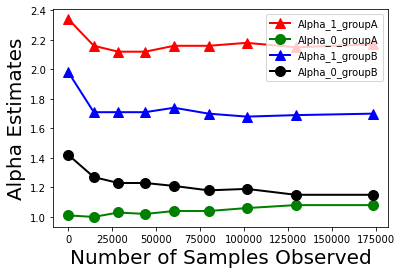

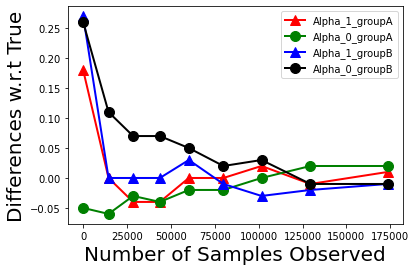

In [46]:
plt.plot(info['Alpha_1_group1'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_1_group1'].dropna()[:len(info['Alpha_1_group1'].dropna())-1],
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Alpha_0_group1'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_0_group1'].dropna()[:len(info['Alpha_0_group1'].dropna())-1],
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.plot(info['Alpha_1_group0'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_1_group0'].dropna()[:len(info['Alpha_1_group0'].dropna())-1],
         lw=2,color='blue',marker='^',ms=10, markevery=1,markerfacecolor='blue')
plt.plot(info['Alpha_0_group0'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_0_group0'].dropna()[:len(info['Alpha_0_group0'].dropna())-1],
         lw=2,color='black', marker='o',ms=10, markevery=1,markerfacecolor='black')
plt.legend(['Alpha_1_groupA','Alpha_0_groupA','Alpha_1_groupB','Alpha_0_groupB'],fontsize=10)
plt.xlabel('Number of Samples Observed', fontsize=20)
plt.ylabel('Alpha Estimates', fontsize=20)
plt.show()


plt.plot(info['Alpha_1_group1'].dropna().index[:len(info['Alpha_1_group1'].dropna())-1],info['Alpha_1_group1'].dropna()[:len(info['Alpha_1_group1'].dropna())-1]-a1_true_group1,
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Alpha_1_group1'].dropna().index[:len(info['Alpha_0_group1'].dropna())-1],info['Alpha_0_group1'].dropna()[:len(info['Alpha_0_group1'].dropna())-1]-a0_true_group1,
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.plot(info['Alpha_1_group1'].dropna().index[:len(info['Alpha_1_group0'].dropna())-1],info['Alpha_1_group0'].dropna()[:len(info['Alpha_1_group0'].dropna())-1]-a1_true_group0,
         lw=2,color='blue',marker='^',ms=10, markevery=1,markerfacecolor='blue')
plt.plot(info['Alpha_1_group1'].dropna().index[:len(info['Alpha_0_group0'].dropna())-1],info['Alpha_0_group0'].dropna()[:len(info['Alpha_0_group0'].dropna())-1]-a0_true_group0,
         lw=2,color='black', marker='o',ms=10, markevery=1,markerfacecolor='black')
plt.legend(['Alpha_1_groupA','Alpha_0_groupA','Alpha_1_groupB','Alpha_0_groupB'],fontsize=10)
plt.xlabel('Number of Samples Observed', fontsize=20)
plt.ylabel('Differences w.r.t True', fontsize=20)
plt.show()


In [ ]:
plt.plot(info['Explore_Prob_group1'].dropna().index[:len(info['Explore_Prob_group1'].dropna())],info['Explore_Prob_group1'].dropna()[:len(info['Explore_Prob_group1'].dropna())],
         lw=2,color='red',marker='^',ms=10, markevery=1,markerfacecolor='red')
plt.plot(info['Explore_Prob_group0'].dropna().index[:len(info['Explore_Prob_group0'].dropna())],info['Explore_Prob_group0'].dropna()[:len(info['Explore_Prob_group0'].dropna())],
         lw=2,color='green', marker='o',ms=10, markevery=1,markerfacecolor='green')
plt.legend(['Explore_Prob_groupA','Explore_Prob_groupB'],fontsize=15)
plt.xlabel('Number of Samples Observed', fontsize=20)
plt.ylabel('Alpha Estimates for GroupB', fontsize=20)
plt.show()

In [47]:
data = [info['Alpha_1_group1'].dropna(), info['Alpha_0_group1'].dropna(),info['Alpha_1_group0'].dropna(),info['Alpha_0_group0'].dropna()]
df = pd.DataFrame(data=data)
df['True'] = [a1_true_group1,a0_true_group1,a1_true_group0,a0_true_group0]
df.insert(0,'Total',[len(white_1),len(white_0),len(Nonwhite_1),len(Nonwhite_0)])
print (df)

                 Total     0  14458  28467  43710  60209  79914  101640  \
Alpha_1_group1  100769  2.34   2.16   2.12   2.12   2.16   2.16    2.18   
Alpha_0_group1   32396  1.01   1.00   1.03   1.02   1.04   1.04    1.06   
Alpha_1_group0   20755  1.98   1.71   1.71   1.71   1.74   1.70    1.68   
Alpha_0_group0   20127  1.42   1.27   1.23   1.23   1.21   1.18    1.19   

                129496  173442  True  
Alpha_1_group1    2.15    2.17  2.16  
Alpha_0_group1    1.08    1.08  1.06  
Alpha_1_group0    1.69    1.70  1.71  
Alpha_0_group0    1.15    1.15  1.16  


In [48]:
info.to_csv('FICO.csv')